# Baseball Case Study

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import  DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

Importiing Required modules

In [2]:
df=pd.read_csv('baseball.csv')

Import the dataset

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Sample data

As we want to predict the number of wins,this is regression model

In [3]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Integer datatypes and float

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Name of the columns

In [5]:
df.shape

(30, 17)

Dataset have 30 rows and 17 columns

In [6]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

Unique values of different columns

In [9]:
df['W'].value_counts()

68     3
83     2
74     2
76     2
81     2
64     1
93     1
92     1
90     1
88     1
87     1
86     1
85     1
84     1
80     1
97     1
100    1
78     1
63     1
79     1
71     1
67     1
98     1
95     1
Name: W, dtype: int64

Target variable value counts.here maximum number of wins 100 have only present one time

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


We can observe the dtypes nul values and memory usage of the dataset

In [11]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

 No missing values present in dataset

In [12]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Stastical summary of dataset, minimum number of wins is 63 and maximum number of wins is 100

# EDA

# Univariate Analysis

In [18]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [17]:
df.iloc[15:16,:]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
15,100,647,5484,1386,288,39,137,506,1267,69,525,478,2.94,1,15,62,96


Datas of maximum number of wins

In [19]:
df.iloc[24:25,:]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
24,63,626,5529,1374,272,37,130,387,1274,88,809,749,4.69,1,7,35,117


datas for minimum number of wins

Here we can see the difference in Earned runs and average of earned runs and saves are mostly affected to number of wins

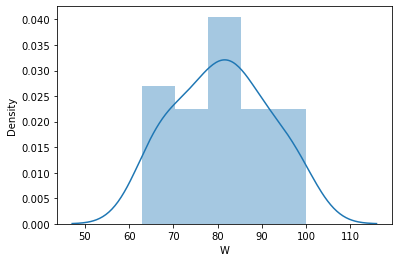

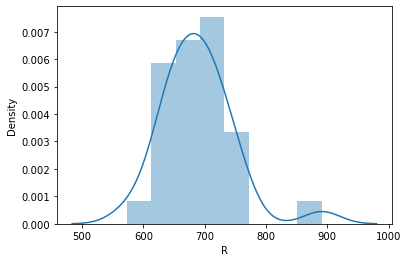

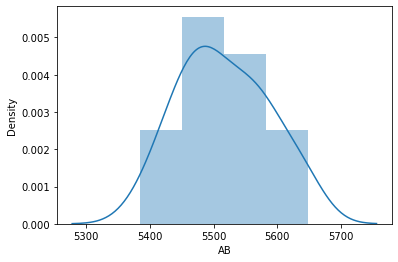

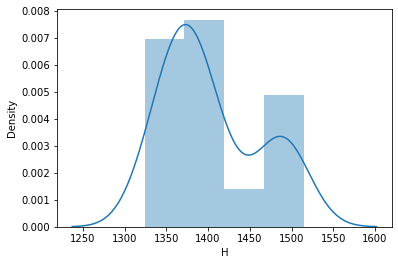

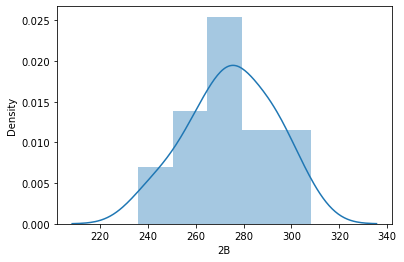

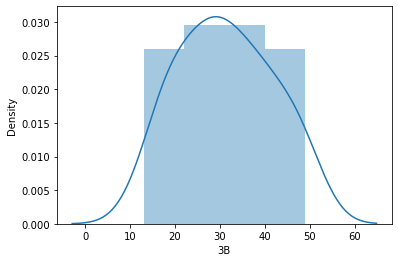

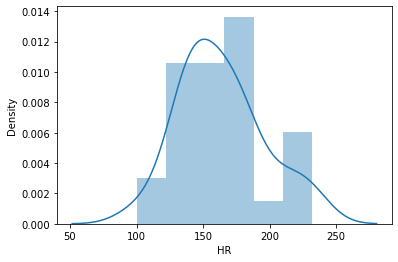

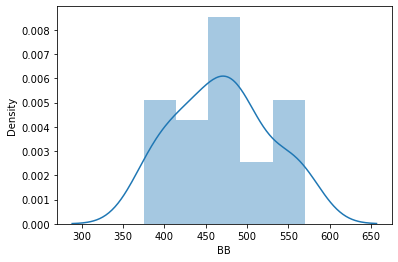

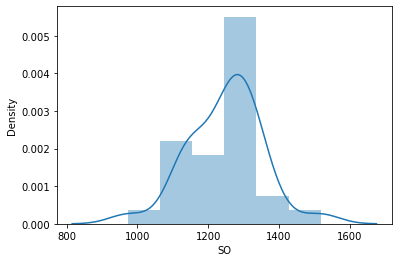

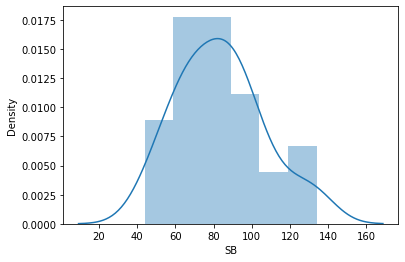

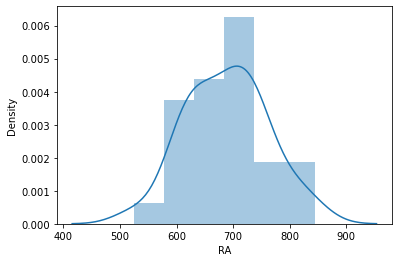

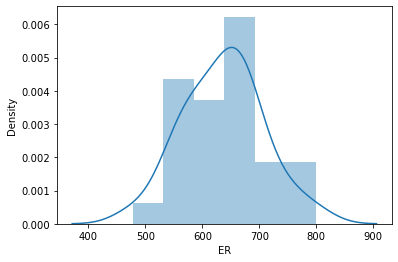

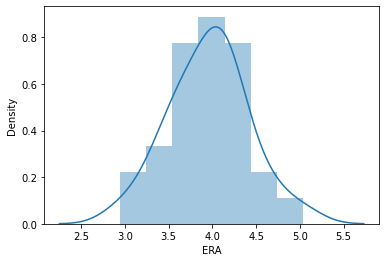

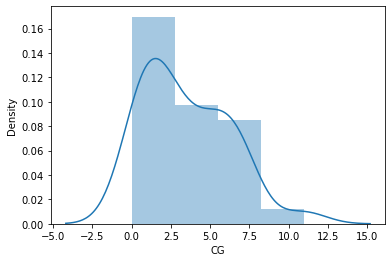

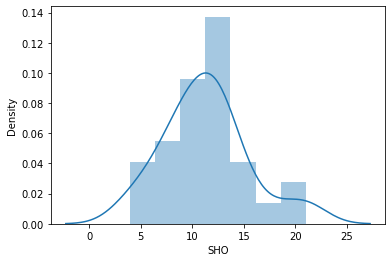

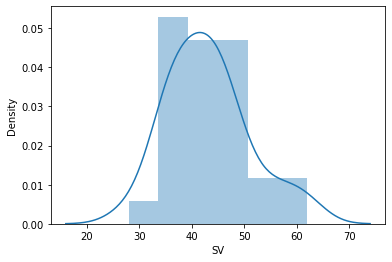

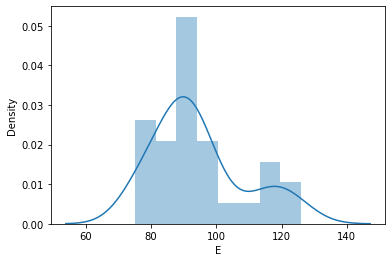

In [14]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

Every features are not normally distributed some are normally distributed

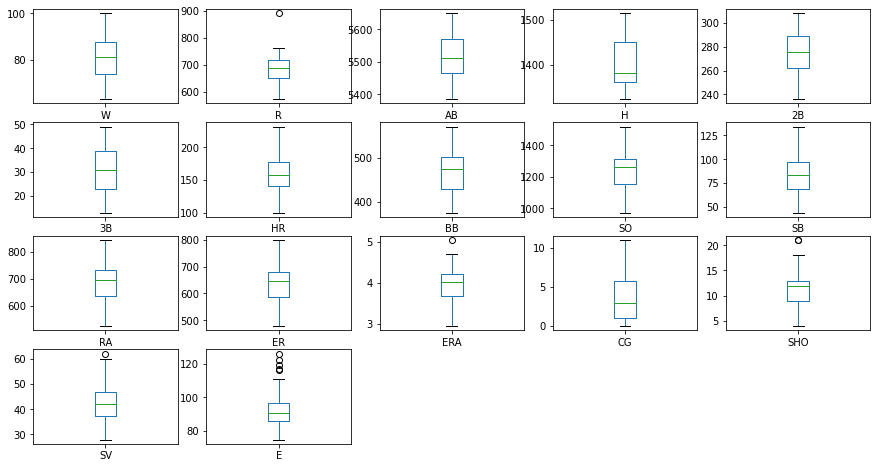

In [11]:
df.plot(kind='box',layout=(4,5),figsize=(15,8),subplots=True)
plt.show()

Outliers present only in the Error column

# Bivariate Anlaysis

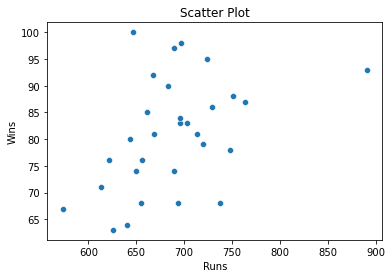

In [13]:
plt.xlabel("Runs")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="R",y="W",data=df)
plt.show()

Number of wins not increasing while runs increase

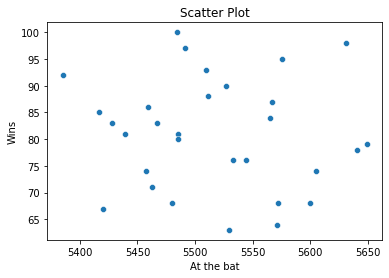

In [14]:
plt.xlabel("At the bat")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="AB",y="W",data=df)
plt.show()

Increase number of wins while increase in At bat

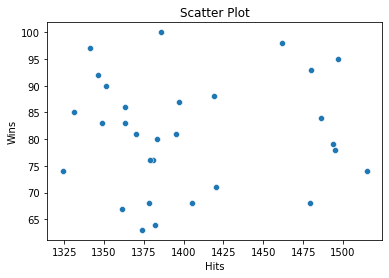

In [15]:
plt.xlabel("Hits")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="H",y="W",data=df)
plt.show()

Increase in hits not affected t increase in number of wins

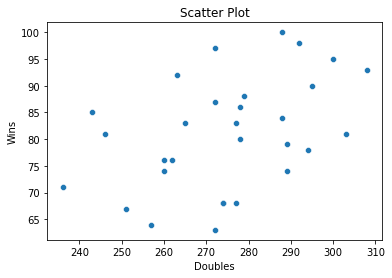

In [16]:
plt.xlabel("Doubles")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="2B",y="W",data=df)
plt.show()

when the number of doubles where in between 280-290 number of win is maximum

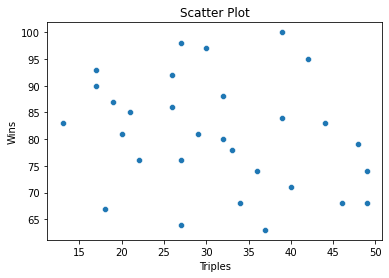

In [17]:
plt.xlabel("Triples")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="3B",y="W",data=df)
plt.show()

When triple value at 38-40 it gives maximum number of wins

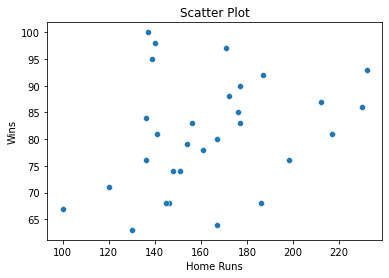

In [18]:
plt.xlabel("Home Runs")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="HR",y="W",data=df)
plt.show()

When the value of home runs in between 130-140 nuber of wins is maximum

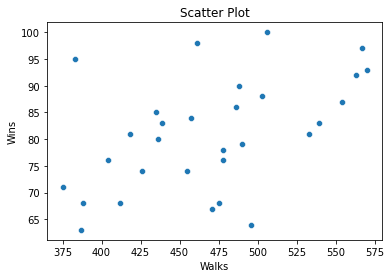

In [19]:
plt.xlabel("Walks")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="BB",y="W",data=df)
plt.show()

When the value walk or base on balls(BB) where in betweeen 500-520 number of wins is maximum

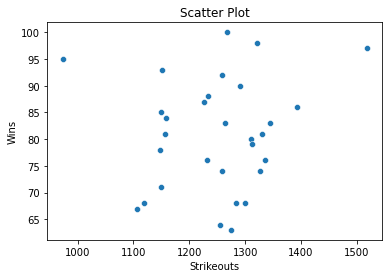

In [20]:
plt.xlabel("Strikeouts")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="SO",y="W",data=df)
plt.show()

Number of wins is maximum at the value of strikeouts were 1250-1300

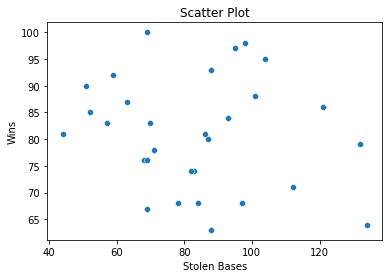

In [21]:
plt.xlabel("Stolen Bases")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="SB",y="W",data=df)
plt.show()

Number of wins is maximum when the values of stolen bases where inn between 70-80

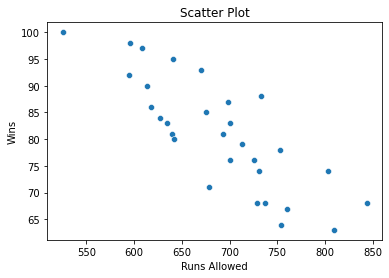

In [22]:
plt.xlabel("Runs Allowed")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="RA",y="W",data=df)
plt.show()

When the value of runs allowed increases the number of wins is decreases

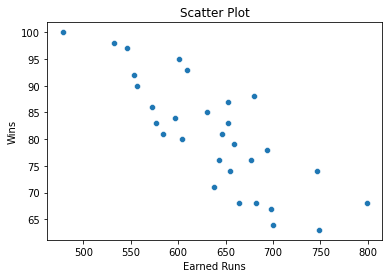

In [23]:
plt.xlabel("Earned Runs")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="ER",y="W",data=df)
plt.show()

When earned runs increases the number of wins decreases

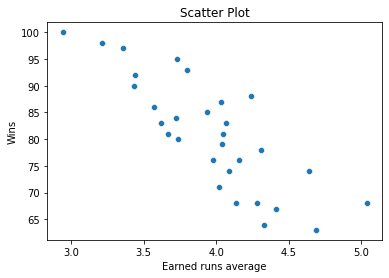

In [24]:
plt.xlabel("Earned runs average")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="ERA",y="W",data=df)
plt.show()

Also the average of ERAincreases the number of wins decreases

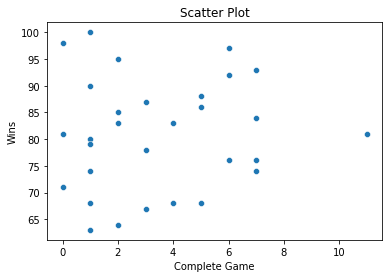

In [25]:
plt.xlabel("Complete Game")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="CG",y="W",data=df)
plt.show()

The complete game is zero then only number of wins increases and reach the maximum wins and high possibility of winning

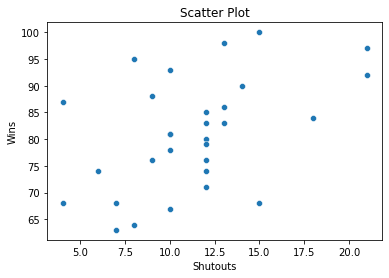

In [26]:
plt.xlabel("Shutouts")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="SHO",y="W",data=df)
plt.show()

We can observe that when the value of shutouts lies in 15 it gives the maximum number of wins

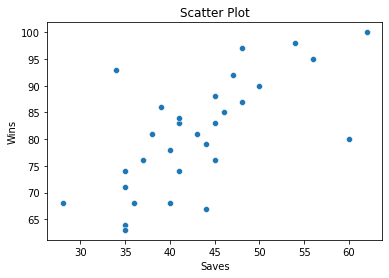

In [27]:
plt.xlabel("Saves")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="SV",y="W",data=df)
plt.show()

Increase the saves to get maximum number of wins so try to save maximum runs

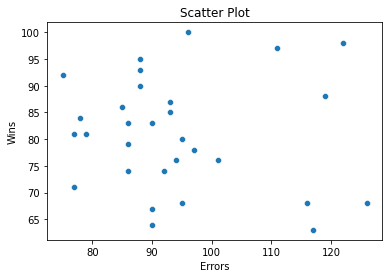

In [28]:
plt.xlabel("Errors")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="E",y="W",data=df)
plt.show()

increase in errors gives decrease in possibility of wins, here the error value between 95-100 gives maximum number of wins

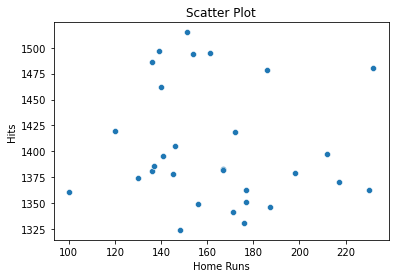

In [29]:
plt.xlabel("Home Runs")
plt.ylabel("Hits")
plt.title("Scatter Plot")
sns.scatterplot(x="HR",y="H",data=df)
plt.show()

We can observe that maximum hits are between 140-150 home runs

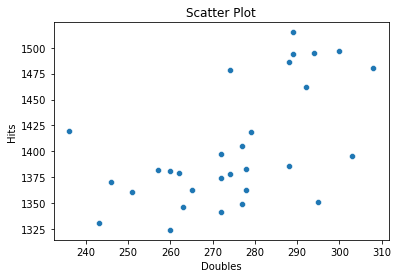

In [30]:
plt.xlabel("Doubles")
plt.ylabel("Hits")
plt.title("Scatter Plot")
sns.scatterplot(x="2B",y="H",data=df)
plt.show()

 We can observe that maximum hits are between 290-300 doubles

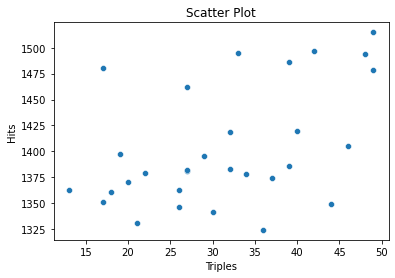

In [31]:
plt.xlabel("Triples")
plt.ylabel("Hits")
plt.title("Scatter Plot")
sns.scatterplot(x="3B",y="H",data=df)
plt.show()

So we can observe that maximum hits increases when the triples increases

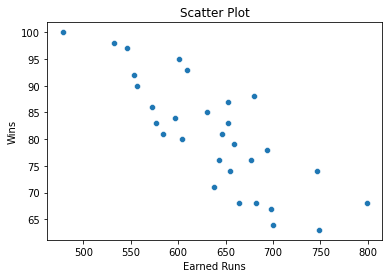

In [20]:
plt.xlabel("Earned Runs")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="ER",y="W",data=df)
plt.show()

We can observe when earned runs increases number of wins decreases

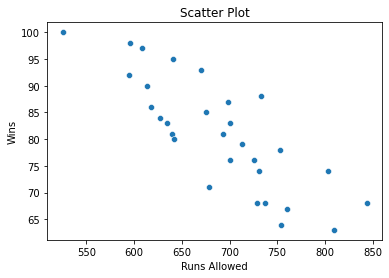

In [21]:
plt.xlabel("Runs Allowed")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="RA",y="W",data=df)
plt.show()

Here also we can observe that when runs allowed increases the number of wins decreases

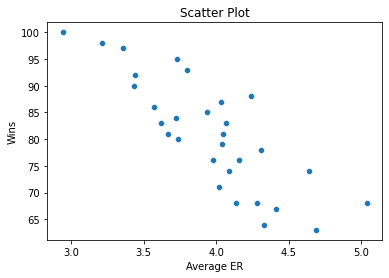

In [22]:
plt.xlabel("Average ER")
plt.ylabel("Wins")
plt.title("Scatter Plot")
sns.scatterplot(x="ERA",y="W",data=df)
plt.show()

Average earned runs also affect in number of wins. When the average of runs increases of wins decreases

# Multivariate Analysis

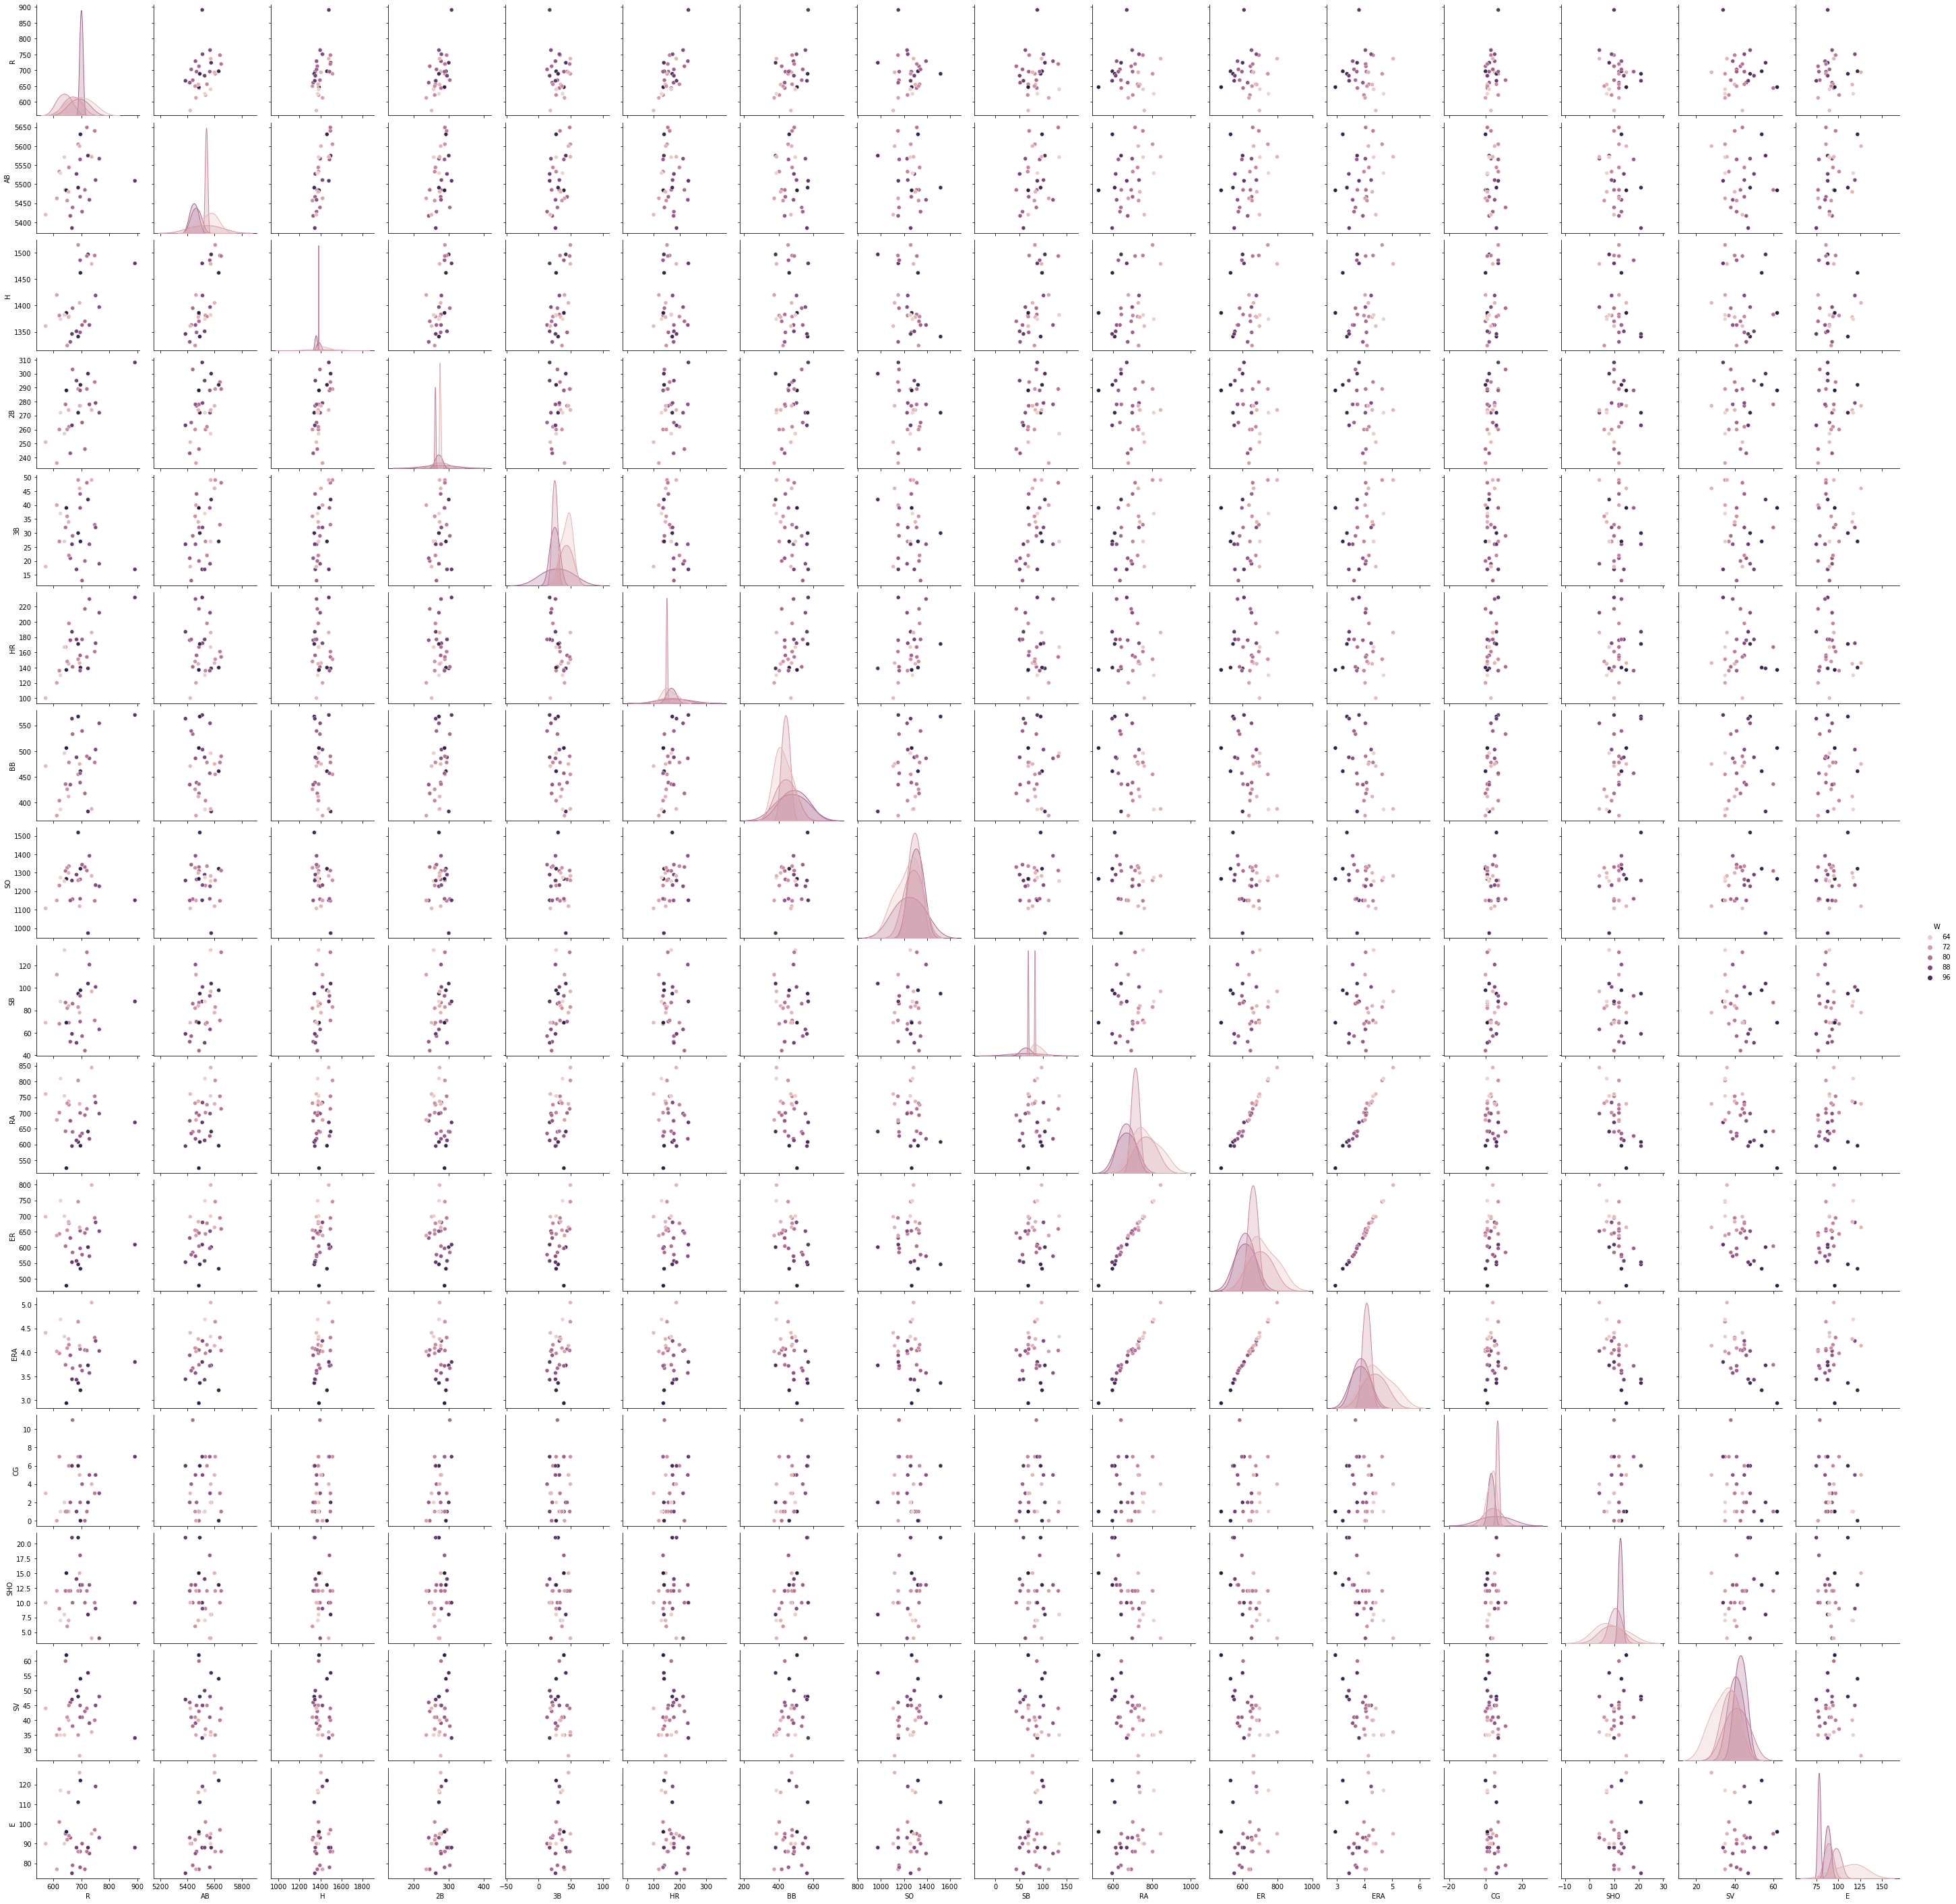

In [32]:
sns.pairplot(df,hue='W')
plt.show()

We can see the relation between features with other features and features with target variable number of wins

In [25]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Outliers Removal

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(df))
base=df[(z<3).all(axis=1)]

Outliers removed using zscore

In [26]:
df.shape

(30, 17)

Shape of dataframe before removing outliers

In [27]:
base.shape

(29, 17)

Shape of dataframe after removing outliers

In [30]:
base

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [31]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [36]:
print("Percentage of data loss after removing outliers:",(30-29)/30*100)

Percentage of data loss after removing outliers: 3.3333333333333335


We have loss upto 3.3% of data which is not a big loss,so I am proceeding with removing outliers

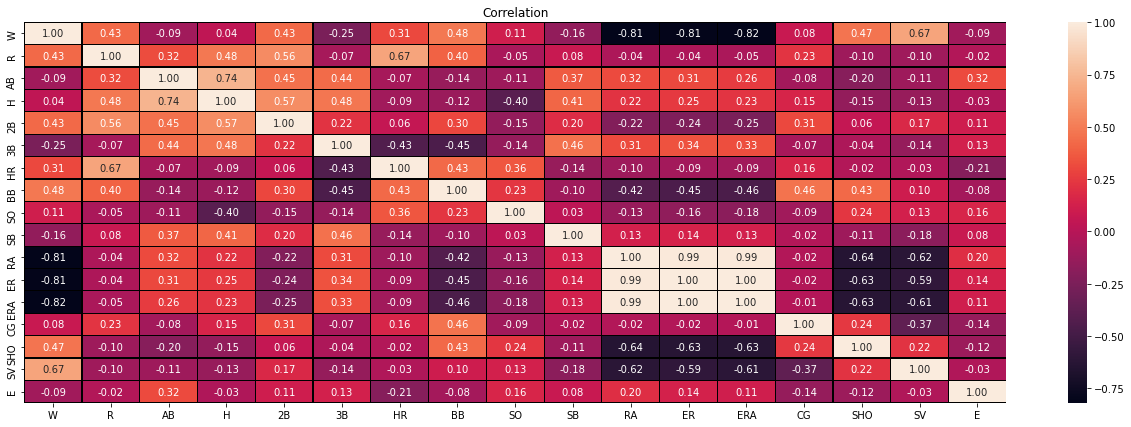

In [32]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")
plt.title("Correlation")
plt.show()

# Correlation

Here we can observe that hits are least correlated to target variable number of wins and saves are highly positive correlated to target variable.
And Runsallowed,earned runs,average of earned runs are highly negative correlated to number of wins

# Seperating features and target

In [33]:
x=df.drop('W', axis = 1)
y =df['W']

Seperated feature and target

In [34]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Features

In [37]:
pd.DataFrame(y)

,W
0,95
1,83
2,81
3,76
4,74
5,93
6,87
7,81
8,80
9,78


Target

# Multicollinearity

# VIF(Variance Inflation Factor)

In [38]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
#checking values
vif

,vif,features
0,1638.985029,R
1,4277.157018,AB
2,4698.798408,H
3,904.439835,2B
4,32.435486,3B
5,285.773237,HR
6,269.485018,BB
7,398.234104,SO
8,28.654970,SB
9,17204.829356,RA


Here we can observe some columns are highly multicolinnear which have highest vif factor.So we want to drop it.

In [39]:
def vif_calc(x):
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

USeing function for vif

In [40]:
vif_calc(x)

      VIF Factor features
0    1638.985029        R
1    4277.157018       AB
2    4698.798408        H
3     904.439835       2B
4      32.435486       3B
5     285.773237       HR
6     269.485018       BB
7     398.234104       SO
8      28.654970       SB
9   17204.829356       RA
10  49837.289228       ER
11  23551.544014      ERA
12      6.771036       CG
13     30.276598      SHO
14    119.686080       SV
15     94.215202        E


Vif present

In [41]:
x.drop(['H'],axis=1,inplace=True)

Dropped 'H' column lets check vif one's more after dropping H

In [43]:
vif_calc(x)

      VIF Factor features
0     928.031355        R
1    1860.261213       AB
2     892.371868       2B
3      31.768060       3B
4     203.377551       HR
5     244.512742       BB
6     397.125346       SO
7      26.307233       SB
8   16188.790152       RA
9   42233.828865       ER
10  21068.905570      ERA
11      6.461902       CG
12     29.173651      SHO
13    119.353558       SV
14     78.363489        E


In [44]:
x.drop(['ER'],axis=1,inplace=True)

Dropped ER

In [45]:
vif_calc(x)

     VIF Factor features
0    890.050874        R
1   1859.280337       AB
2    891.497443       2B
3     30.218753       3B
4    164.900530       HR
5    235.798169       BB
6    346.769029       SO
7     22.947838       SB
8   8388.034218       RA
9   6577.696179      ERA
10     6.403656       CG
11    27.883084      SHO
12    94.817123       SV
13    78.288499        E


dropped column which have high multicollinearity, If we drop more we don't have any features for modelling so let's check the accuracy of model

# Skewness

In [46]:
x.skew()

R      1.200786
AB     0.183437
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Skewness present in two columns CG and E saves and errors columns

# Removal of Skewness

In [47]:
x['SV']=np.sqrt(x['SV'])
x['E']=np.log(x['E'])

In [49]:
x['R']=np.log(x['R'])
x['CG']=np.sqrt(x['CG'])

Removed skewness using sqrt and log transformation

In [52]:
x.skew()

R      0.744196
AB     0.183437
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ERA    0.053331
CG    -0.311476
SHO    0.565790
SV     0.410288
E      0.630080
dtype: float64

Now we can observe that skewness removed

# Scaling

In [53]:
sc=StandardScaler()
x=sc.fit_transform(x)

Scaled features using standard scaler

# Model Building

In [54]:
#knearest neighbor
knn=KNeighborsRegressor()
k=[]
for i in range(0,1100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print(f"At random state {i},'the training accuracy is: {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        k.append(i)

At random state 0,'the training accuracy is: 0.7440468090896721
At random state 0,the testing accuracy is:- 0.3506432748538012


At random state 1,'the training accuracy is: 0.6511487923665639
At random state 1,the testing accuracy is:- 0.6309926262053318


At random state 2,'the training accuracy is: 0.7184135472370768
At random state 2,the testing accuracy is:- 0.5458342046303213


At random state 3,'the training accuracy is: 0.6865543288785587
At random state 3,the testing accuracy is:- 0.5891541135573581


At random state 4,'the training accuracy is: 0.5359182295067205
At random state 4,the testing accuracy is:- 0.2982613837965704


At random state 5,'the training accuracy is: 0.7406547856288789
At random state 5,the testing accuracy is:- 0.5256524873828408


At random state 6,'the training accuracy is: 0.6736550742237393
At random state 6,the testing accuracy is:- 0.3800547345374933


At random state 7,'the training accuracy is: 0.6305329866753331
At random state 7,the testing acc

At random state 71,'the training accuracy is: 0.6299203354297693
At random state 71,the testing accuracy is:- 0.47657804685443494


At random state 72,'the training accuracy is: 0.6615160441322572
At random state 72,the testing accuracy is:- 0.5666666666666671


At random state 73,'the training accuracy is: 0.6252523961661342
At random state 73,the testing accuracy is:- 0.4985438705662727


At random state 74,'the training accuracy is: 0.6884107065818844
At random state 74,the testing accuracy is:- 0.11743354720439891


At random state 75,'the training accuracy is: 0.6601352568155258
At random state 75,the testing accuracy is:- 0.6491379310344829


At random state 76,'the training accuracy is: 0.6474794944663941
At random state 76,the testing accuracy is:- 0.5378231292517006


At random state 77,'the training accuracy is: 0.7070423423245917
At random state 77,the testing accuracy is:- 0.6463131313131313


At random state 78,'the training accuracy is: 0.7472022583352407
At random state 

At random state 135,'the training accuracy is: 0.5714487414408332
At random state 135,the testing accuracy is:- 0.527313432835821


At random state 136,'the training accuracy is: 0.5704520054370106
At random state 136,the testing accuracy is:- 0.47291278113000546


At random state 137,'the training accuracy is: 0.7009506938293476
At random state 137,the testing accuracy is:- 0.4643272080616476


At random state 138,'the training accuracy is: 0.5572065955383123
At random state 138,the testing accuracy is:- 0.6913458471353207


At random state 139,'the training accuracy is: 0.7744474656626927
At random state 139,the testing accuracy is:- 0.44094663987497174


At random state 140,'the training accuracy is: 0.7397298892021241
At random state 140,the testing accuracy is:- 0.5643287845128528


At random state 141,'the training accuracy is: 0.7206108764836573
At random state 141,the testing accuracy is:- 0.2531855955678671


At random state 142,'the training accuracy is: 0.767281691876948
At 

At random state 203,'the training accuracy is: 0.594839706450367
At random state 203,the testing accuracy is:- -0.05684830633284266


At random state 204,'the training accuracy is: 0.7098197764586343
At random state 204,the testing accuracy is:- 0.6821220159151191


At random state 205,'the training accuracy is: 0.6534033953112369
At random state 205,the testing accuracy is:- 0.7575966900521675


At random state 206,'the training accuracy is: 0.5723077729715561
At random state 206,the testing accuracy is:- 0.4801726618705038


At random state 207,'the training accuracy is: 0.6252432193112476
At random state 207,the testing accuracy is:- 0.714314592545799


At random state 208,'the training accuracy is: 0.5872451558550968
At random state 208,the testing accuracy is:- 0.5497153640509512


At random state 209,'the training accuracy is: 0.5771353632113126
At random state 209,the testing accuracy is:- 0.3645796606956687


At random state 210,'the training accuracy is: 0.735264950434766
At r

At random state 270,'the training accuracy is: 0.6890961508493066
At random state 270,the testing accuracy is:- 0.46683009039374934


At random state 271,'the training accuracy is: 0.6989660669551354
At random state 271,the testing accuracy is:- 0.360251256281407


At random state 272,'the training accuracy is: 0.6471452811421217
At random state 272,the testing accuracy is:- 0.5673712737127371


At random state 273,'the training accuracy is: 0.6214627498485767
At random state 273,the testing accuracy is:- 0.5227014319298996


At random state 274,'the training accuracy is: 0.5831387796772163
At random state 274,the testing accuracy is:- 0.38745000000000007


At random state 275,'the training accuracy is: 0.7000095556617296
At random state 275,the testing accuracy is:- 0.6028939004086574


At random state 276,'the training accuracy is: 0.5481002398478209
At random state 276,the testing accuracy is:- 0.6500677812923634


At random state 277,'the training accuracy is: 0.7189319807839014
At

At random state 337,'the training accuracy is: 0.7294634146341463
At random state 337,the testing accuracy is:- 0.5479033680126961


At random state 338,'the training accuracy is: 0.6969932779754844
At random state 338,the testing accuracy is:- -0.7806513872135108


At random state 339,'the training accuracy is: 0.6624715468466698
At random state 339,the testing accuracy is:- 0.5993116634799236


At random state 340,'the training accuracy is: 0.5984605577689244
At random state 340,the testing accuracy is:- 0.1863512046885174


At random state 341,'the training accuracy is: 0.6483379476645528
At random state 341,the testing accuracy is:- 0.5230166926864417


At random state 342,'the training accuracy is: 0.8637915497474544
At random state 342,the testing accuracy is:- -1.351919866444073


At random state 343,'the training accuracy is: 0.6693269598470364
At random state 343,the testing accuracy is:- 0.5063985530375573


At random state 344,'the training accuracy is: 0.7508376789515829
At

At random state 412,'the training accuracy is: 0.6726379262545052
At random state 412,the testing accuracy is:- 0.6192436326215593


At random state 413,'the training accuracy is: 0.6382094890085328
At random state 413,the testing accuracy is:- 0.5860821917808223


At random state 414,'the training accuracy is: 0.7928835559580409
At random state 414,the testing accuracy is:- 0.3539622641509431


At random state 415,'the training accuracy is: 0.7246156262269337
At random state 415,the testing accuracy is:- -0.2665900642108825


At random state 416,'the training accuracy is: 0.7111305767945957
At random state 416,the testing accuracy is:- 0.6138603517325443


At random state 417,'the training accuracy is: 0.7403162251655628
At random state 417,the testing accuracy is:- 0.35073149105955415


At random state 418,'the training accuracy is: 0.5642480322861156
At random state 418,the testing accuracy is:- 0.6492607348384243


At random state 419,'the training accuracy is: 0.7705839416058394
A

At random state 486,'the training accuracy is: 0.6930586809762852
At random state 486,the testing accuracy is:- 0.6916354234001291


At random state 486 model performs well
At random state 487,'the training accuracy is: 0.527304440687016
At random state 487,the testing accuracy is:- 0.6952207140412914


At random state 488,'the training accuracy is: 0.5700339426243934
At random state 488,the testing accuracy is:- 0.4804342581423403


At random state 489,'the training accuracy is: 0.7463202804206313
At random state 489,the testing accuracy is:- 0.4846859083191851


At random state 490,'the training accuracy is: 0.6786623618208641
At random state 490,the testing accuracy is:- 0.5802485143165859


At random state 491,'the training accuracy is: 0.7193206929477561
At random state 491,the testing accuracy is:- 0.5314123330491618


At random state 492,'the training accuracy is: 0.6333886166603844
At random state 492,the testing accuracy is:- 0.5088400075202104


At random state 493,'the train

At random state 551,'the training accuracy is: 0.5751540678341831
At random state 551,the testing accuracy is:- 0.6069235064209939


At random state 552,'the training accuracy is: 0.7552334016279972
At random state 552,the testing accuracy is:- 0.5292416725726439


At random state 553,'the training accuracy is: 0.6843588916914793
At random state 553,the testing accuracy is:- 0.39189781021897785


At random state 554,'the training accuracy is: 0.6140224719101125
At random state 554,the testing accuracy is:- 0.5565883335321482


At random state 555,'the training accuracy is: 0.6601624003750586
At random state 555,the testing accuracy is:- 0.5135091277890467


At random state 556,'the training accuracy is: 0.7130646827856996
At random state 556,the testing accuracy is:- 0.3884297520661155


At random state 557,'the training accuracy is: 0.6104956896551724
At random state 557,the testing accuracy is:- 0.5060496833901604


At random state 558,'the training accuracy is: 0.7982890436265453
At

At random state 617,'the training accuracy is: 0.6742173922147539
At random state 617,the testing accuracy is:- 0.4209444732745198


At random state 618,'the training accuracy is: 0.7121598815692078
At random state 618,the testing accuracy is:- 0.6928271234328094


At random state 619,'the training accuracy is: 0.6439838573065619
At random state 619,the testing accuracy is:- 0.7146296296296295


At random state 620,'the training accuracy is: 0.7478018071139938
At random state 620,the testing accuracy is:- 0.7218630136986304


At random state 621,'the training accuracy is: 0.7366520136131594
At random state 621,the testing accuracy is:- 0.09749944678026146


At random state 622,'the training accuracy is: 0.6590919252674723
At random state 622,the testing accuracy is:- 0.7518204488778054


At random state 623,'the training accuracy is: 0.4706072633459021
At random state 623,the testing accuracy is:- 0.6187993405101346


At random state 624,'the training accuracy is: 0.5752144635704233
At

At random state 692,'the training accuracy is: 0.6817761185138114
At random state 692,the testing accuracy is:- 0.6705941213258286


At random state 693,'the training accuracy is: 0.8024670045666683
At random state 693,the testing accuracy is:- 0.04709090909090918


At random state 694,'the training accuracy is: 0.77870833253648
At random state 694,the testing accuracy is:- 0.54006600660066


At random state 695,'the training accuracy is: 0.5603278145695364
At random state 695,the testing accuracy is:- 0.5611947560481148


At random state 695 model performs well
At random state 696,'the training accuracy is: 0.6202211981566821
At random state 696,the testing accuracy is:- 0.7235374149659864


At random state 697,'the training accuracy is: 0.6731785796368654
At random state 697,the testing accuracy is:- 0.49244490005125585


At random state 698,'the training accuracy is: 0.7281663906547715
At random state 698,the testing accuracy is:- 0.6713454545454546


At random state 699,'the traini

At random state 770,'the training accuracy is: 0.6369892778023926
At random state 770,the testing accuracy is:- 0.6199326599326604


At random state 771,'the training accuracy is: 0.6177282300820683
At random state 771,the testing accuracy is:- 0.7229575571346264


At random state 772,'the training accuracy is: 0.6530686561861623
At random state 772,the testing accuracy is:- 0.46665171688857743


At random state 773,'the training accuracy is: 0.7661780104712042
At random state 773,the testing accuracy is:- 0.40448022732654454


At random state 774,'the training accuracy is: 0.6553226791316615
At random state 774,the testing accuracy is:- 0.5789256198347106


At random state 775,'the training accuracy is: 0.7124112976523247
At random state 775,the testing accuracy is:- 0.4273684210526315


At random state 776,'the training accuracy is: 0.6127572238725356
At random state 776,the testing accuracy is:- 0.10039086975980949


At random state 777,'the training accuracy is: 0.7678835446434562


At random state 833,'the training accuracy is: 0.735767890491134
At random state 833,the testing accuracy is:- -0.2417721518987337


At random state 834,'the training accuracy is: 0.5110619888916801
At random state 834,the testing accuracy is:- 0.4009571958206942


At random state 835,'the training accuracy is: 0.7260580851221866
At random state 835,the testing accuracy is:- 0.4910783122069804


At random state 836,'the training accuracy is: 0.7069308268137559
At random state 836,the testing accuracy is:- 0.7609195402298852


At random state 837,'the training accuracy is: 0.7333348080148943
At random state 837,the testing accuracy is:- 0.46855913978494623


At random state 838,'the training accuracy is: 0.6672779129267679
At random state 838,the testing accuracy is:- 0.40713784155090804


At random state 839,'the training accuracy is: 0.6638007078682278
At random state 839,the testing accuracy is:- 0.517154190658989


At random state 840,'the training accuracy is: 0.7024044685147095
At

At random state 913,'the training accuracy is: 0.6698374906326947
At random state 913,the testing accuracy is:- 0.31033333333333357


At random state 914,'the training accuracy is: 0.7251556420233464
At random state 914,the testing accuracy is:- 0.5682205146969141


At random state 915,'the training accuracy is: 0.6663184931506849
At random state 915,the testing accuracy is:- 0.11044514716613962


At random state 916,'the training accuracy is: 0.6404088561929688
At random state 916,the testing accuracy is:- 0.5157230056830142


At random state 917,'the training accuracy is: 0.6299757608402909
At random state 917,the testing accuracy is:- 0.7402668699961876


At random state 918,'the training accuracy is: 0.6703237410071942
At random state 918,the testing accuracy is:- 0.617680525164114


At random state 919,'the training accuracy is: 0.5062834376778602
At random state 919,the testing accuracy is:- 0.380781205233502


At random state 920,'the training accuracy is: 0.7425377510628942
At 

At random state 993,'the training accuracy is: 0.636551465466431
At random state 993,the testing accuracy is:- 0.637786688051323


At random state 993 model performs well
At random state 994,'the training accuracy is: 0.6973793988661887
At random state 994,the testing accuracy is:- 0.4427852998065763


At random state 995,'the training accuracy is: 0.53771855010661
At random state 995,the testing accuracy is:- 0.5155745218903115


At random state 996,'the training accuracy is: 0.7248412246420927
At random state 996,the testing accuracy is:- 0.3143147208121825


At random state 997,'the training accuracy is: 0.5649016822429906
At random state 997,the testing accuracy is:- 0.22204656199242023


At random state 998,'the training accuracy is: 0.6723254951413101
At random state 998,the testing accuracy is:- 0.7012080044060949


At random state 999,'the training accuracy is: 0.5618391700777512
At random state 999,the testing accuracy is:- 0.182251082251082


At random state 1000,'the trainin

At random state 1055,'the training accuracy is: 0.7180334927239231
At random state 1055,the testing accuracy is:- 0.446736111111111


At random state 1056,'the training accuracy is: 0.6720758167761243
At random state 1056,the testing accuracy is:- 0.5307933607431097


At random state 1057,'the training accuracy is: 0.5642390966538902
At random state 1057,the testing accuracy is:- 0.3039074344992686


At random state 1058,'the training accuracy is: 0.7240708446866486
At random state 1058,the testing accuracy is:- 0.015399663762800109


At random state 1059,'the training accuracy is: 0.7409858979158868
At random state 1059,the testing accuracy is:- 0.08750515463917541


At random state 1060,'the training accuracy is: 0.5808645065277683
At random state 1060,the testing accuracy is:- 0.5314086956521742


At random state 1061,'the training accuracy is: 0.7450843673841461
At random state 1061,the testing accuracy is:- 0.4616294160057678


At random state 1062,'the training accuracy is: 0.735

Checking best random state data splitted into trained and tested data and apply knn regressor

In [55]:
k

[262, 335, 486, 668, 695, 805, 848, 851, 868, 905, 993]

List of equal test and trained accuracy

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=805)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("r2 score",r2_score(y_test,predknn)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predknn))
print("RMSE",np.sqrt(mean_squared_error(y_test,predknn)))

r2 score 67.97257926306773
Mean Absolute error 4.266666666666663
RMSE 5.580919876388357


r2 score of knn is 67% and mean absolute error and RMSE is given and choose best random state=805

In [65]:
#decisiontree regressor
dt=DecisionTreeRegressor()
d=[]
for i in range(0,1100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f"At random state {i},'the training accuracy is: {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        d.append(i)

At random state 0,'the training accuracy is: 1.0
At random state 0,the testing accuracy is:- -1.0008561643835616


At random state 1,'the training accuracy is: 1.0
At random state 1,the testing accuracy is:- 0.2831230283911672


At random state 2,'the training accuracy is: 1.0
At random state 2,the testing accuracy is:- 0.11128650355169689


At random state 3,'the training accuracy is: 1.0
At random state 3,the testing accuracy is:- 0.4838822704975473


At random state 4,'the training accuracy is: 1.0
At random state 4,the testing accuracy is:- -0.7419354838709677


At random state 5,'the training accuracy is: 1.0
At random state 5,the testing accuracy is:- 0.44479804161566705


At random state 6,'the training accuracy is: 1.0
At random state 6,the testing accuracy is:- 0.2389344262295081


At random state 7,'the training accuracy is: 1.0
At random state 7,the testing accuracy is:- 0.37531172069825447


At random state 8,'the training accuracy is: 1.0
At random state 8,the testing accu

At random state 93,'the training accuracy is: 1.0
At random state 93,the testing accuracy is:- -0.5245212517515181


At random state 94,'the training accuracy is: 1.0
At random state 94,the testing accuracy is:- -0.5633116883116882


At random state 95,'the training accuracy is: 1.0
At random state 95,the testing accuracy is:- 0.39698492462311563


At random state 96,'the training accuracy is: 1.0
At random state 96,the testing accuracy is:- 0.41836734693877553


At random state 97,'the training accuracy is: 1.0
At random state 97,the testing accuracy is:- 0.6188630490956073


At random state 98,'the training accuracy is: 1.0
At random state 98,the testing accuracy is:- -0.021036106750392358


At random state 99,'the training accuracy is: 1.0
At random state 99,the testing accuracy is:- 0.6998154603239697


At random state 100,'the training accuracy is: 1.0
At random state 100,the testing accuracy is:- -0.9572192513368982


At random state 101,'the training accuracy is: 1.0
At random s

At random state 183,'the training accuracy is: 1.0
At random state 183,the testing accuracy is:- -1.0821192052980133


At random state 184,'the training accuracy is: 1.0
At random state 184,the testing accuracy is:- -2.2626459143968862


At random state 185,'the training accuracy is: 1.0
At random state 185,the testing accuracy is:- -0.5976065818997753


At random state 186,'the training accuracy is: 1.0
At random state 186,the testing accuracy is:- -1.7899022801302928


At random state 187,'the training accuracy is: 1.0
At random state 187,the testing accuracy is:- -0.7663125948406677


At random state 188,'the training accuracy is: 1.0
At random state 188,the testing accuracy is:- -0.07853403141361248


At random state 189,'the training accuracy is: 1.0
At random state 189,the testing accuracy is:- 0.18134055086769618


At random state 190,'the training accuracy is: 1.0
At random state 190,the testing accuracy is:- -0.5397260273972602


At random state 191,'the training accuracy is: 

At random state 258,'the training accuracy is: 1.0
At random state 258,the testing accuracy is:- 0.6279194630872483


At random state 259,'the training accuracy is: 1.0
At random state 259,the testing accuracy is:- 0.4777626193724419


At random state 260,'the training accuracy is: 1.0
At random state 260,the testing accuracy is:- 0.2737931034482758


At random state 261,'the training accuracy is: 1.0
At random state 261,the testing accuracy is:- 0.2850274725274726


At random state 262,'the training accuracy is: 1.0
At random state 262,the testing accuracy is:- -0.12411227595536012


At random state 263,'the training accuracy is: 1.0
At random state 263,the testing accuracy is:- -1.5141509433962264


At random state 264,'the training accuracy is: 1.0
At random state 264,the testing accuracy is:- 0.12495498739647104


At random state 265,'the training accuracy is: 1.0
At random state 265,the testing accuracy is:- 0.25872873769024185


At random state 266,'the training accuracy is: 1.0


At random state 333,'the training accuracy is: 1.0
At random state 333,the testing accuracy is:- -0.23938730853391665


At random state 334,'the training accuracy is: 1.0
At random state 334,the testing accuracy is:- 0.31625441696113077


At random state 335,'the training accuracy is: 1.0
At random state 335,the testing accuracy is:- -0.2718129243148104


At random state 336,'the training accuracy is: 1.0
At random state 336,the testing accuracy is:- -0.2155555555555555


At random state 337,'the training accuracy is: 1.0
At random state 337,the testing accuracy is:- -0.35913043478260875


At random state 338,'the training accuracy is: 1.0
At random state 338,the testing accuracy is:- -2.272727272727273


At random state 339,'the training accuracy is: 1.0
At random state 339,the testing accuracy is:- 0.6534296028880866


At random state 340,'the training accuracy is: 1.0
At random state 340,the testing accuracy is:- -3.2405594405594407


At random state 341,'the training accuracy is: 1

At random state 403,'the training accuracy is: 1.0
At random state 403,the testing accuracy is:- -2.7060414788097384


At random state 404,'the training accuracy is: 1.0
At random state 404,the testing accuracy is:- 0.7505003335557038


At random state 405,'the training accuracy is: 1.0
At random state 405,the testing accuracy is:- -0.04098613251155636


At random state 406,'the training accuracy is: 1.0
At random state 406,the testing accuracy is:- -0.48635329795299476


At random state 407,'the training accuracy is: 1.0
At random state 407,the testing accuracy is:- 0.18981344388510513


At random state 408,'the training accuracy is: 1.0
At random state 408,the testing accuracy is:- 0.22438524590163933


At random state 409,'the training accuracy is: 1.0
At random state 409,the testing accuracy is:- -0.7230142566191446


At random state 410,'the training accuracy is: 1.0
At random state 410,the testing accuracy is:- 0.48094458732756606


At random state 411,'the training accuracy is: 

At random state 499,'the training accuracy is: 1.0
At random state 499,the testing accuracy is:- -0.45819070904645476


At random state 500,'the training accuracy is: 1.0
At random state 500,the testing accuracy is:- -0.17869992804029766


At random state 501,'the training accuracy is: 1.0
At random state 501,the testing accuracy is:- -0.1695692025664528


At random state 502,'the training accuracy is: 1.0
At random state 502,the testing accuracy is:- -1.4469026548672566


At random state 503,'the training accuracy is: 1.0
At random state 503,the testing accuracy is:- -2.1938461538461533


At random state 504,'the training accuracy is: 1.0
At random state 504,the testing accuracy is:- 0.12163616792249732


At random state 505,'the training accuracy is: 1.0
At random state 505,the testing accuracy is:- 0.5435466946484784


At random state 506,'the training accuracy is: 1.0
At random state 506,the testing accuracy is:- 0.4488229273285568


At random state 507,'the training accuracy is: 1

At random state 578,'the training accuracy is: 1.0
At random state 578,the testing accuracy is:- -0.3150348217943464


At random state 579,'the training accuracy is: 1.0
At random state 579,the testing accuracy is:- -0.6650106458481191


At random state 580,'the training accuracy is: 1.0
At random state 580,the testing accuracy is:- -1.9437229437229435


At random state 581,'the training accuracy is: 1.0
At random state 581,the testing accuracy is:- 0.5022245485475008


At random state 582,'the training accuracy is: 1.0
At random state 582,the testing accuracy is:- -1.8899613899613903


At random state 583,'the training accuracy is: 1.0
At random state 583,the testing accuracy is:- -0.11956521739130443


At random state 584,'the training accuracy is: 1.0
At random state 584,the testing accuracy is:- 0.03986034332266519


At random state 585,'the training accuracy is: 1.0
At random state 585,the testing accuracy is:- -0.9310850439882694


At random state 586,'the training accuracy is: 1

At random state 666,'the training accuracy is: 1.0
At random state 666,the testing accuracy is:- 0.21370967741935476


At random state 667,'the training accuracy is: 1.0
At random state 667,the testing accuracy is:- -0.10875984251968496


At random state 668,'the training accuracy is: 1.0
At random state 668,the testing accuracy is:- -0.024603836530441958


At random state 669,'the training accuracy is: 1.0
At random state 669,the testing accuracy is:- 0.33456973293768544


At random state 670,'the training accuracy is: 1.0
At random state 670,the testing accuracy is:- 0.405


At random state 671,'the training accuracy is: 1.0
At random state 671,the testing accuracy is:- -0.2333333333333334


At random state 672,'the training accuracy is: 1.0
At random state 672,the testing accuracy is:- -2.381563593932322


At random state 673,'the training accuracy is: 1.0
At random state 673,the testing accuracy is:- 0.7653352353780314


At random state 674,'the training accuracy is: 1.0
At random 

At random state 763,'the training accuracy is: 1.0
At random state 763,the testing accuracy is:- -0.21474773609314357


At random state 764,'the training accuracy is: 1.0
At random state 764,the testing accuracy is:- -0.43950103950103947


At random state 765,'the training accuracy is: 1.0
At random state 765,the testing accuracy is:- -0.402964959568733


At random state 766,'the training accuracy is: 1.0
At random state 766,the testing accuracy is:- -0.4863445378151261


At random state 767,'the training accuracy is: 1.0
At random state 767,the testing accuracy is:- 0.4256505576208178


At random state 768,'the training accuracy is: 1.0
At random state 768,the testing accuracy is:- 0.2732972356796809


At random state 769,'the training accuracy is: 1.0
At random state 769,the testing accuracy is:- 0.08501664816870147


At random state 770,'the training accuracy is: 1.0
At random state 770,the testing accuracy is:- -0.13346534653465358


At random state 771,'the training accuracy is: 1

At random state 856,'the training accuracy is: 1.0
At random state 856,the testing accuracy is:- -0.3801652892561984


At random state 857,'the training accuracy is: 1.0
At random state 857,the testing accuracy is:- 0.17443711621560154


At random state 858,'the training accuracy is: 1.0
At random state 858,the testing accuracy is:- -1.4110489970404472


At random state 859,'the training accuracy is: 1.0
At random state 859,the testing accuracy is:- 0.19999999999999996


At random state 860,'the training accuracy is: 1.0
At random state 860,the testing accuracy is:- 0.2682926829268293


At random state 861,'the training accuracy is: 1.0
At random state 861,the testing accuracy is:- 0.1566101694915254


At random state 862,'the training accuracy is: 1.0
At random state 862,the testing accuracy is:- -1.906089926010245


At random state 863,'the training accuracy is: 1.0
At random state 863,the testing accuracy is:- -0.5027799841143765


At random state 864,'the training accuracy is: 1.0


At random state 943,'the training accuracy is: 1.0
At random state 943,the testing accuracy is:- -0.24133763094278793


At random state 944,'the training accuracy is: 1.0
At random state 944,the testing accuracy is:- 0.14794007490636707


At random state 945,'the training accuracy is: 1.0
At random state 945,the testing accuracy is:- -3.9565217391304337


At random state 946,'the training accuracy is: 1.0
At random state 946,the testing accuracy is:- -0.42733043768793855


At random state 947,'the training accuracy is: 1.0
At random state 947,the testing accuracy is:- -0.10688140556368952


At random state 948,'the training accuracy is: 1.0
At random state 948,the testing accuracy is:- -2.4121621621621623


At random state 949,'the training accuracy is: 1.0
At random state 949,the testing accuracy is:- 0.3278008298755186


At random state 950,'the training accuracy is: 1.0
At random state 950,the testing accuracy is:- 0.40370116518163124


At random state 951,'the training accuracy is:

At random state 1025,'the training accuracy is: 1.0
At random state 1025,the testing accuracy is:- 0.4354695544115037


At random state 1026,'the training accuracy is: 1.0
At random state 1026,the testing accuracy is:- 0.3183431952662721


At random state 1027,'the training accuracy is: 1.0
At random state 1027,the testing accuracy is:- -1.3716679360243718


At random state 1028,'the training accuracy is: 1.0
At random state 1028,the testing accuracy is:- -1.7588627588627586


At random state 1029,'the training accuracy is: 1.0
At random state 1029,the testing accuracy is:- -7.180769230769229


At random state 1030,'the training accuracy is: 1.0
At random state 1030,the testing accuracy is:- -0.9311783107403546


At random state 1031,'the training accuracy is: 1.0
At random state 1031,the testing accuracy is:- 0.2324030624845641


At random state 1032,'the training accuracy is: 1.0
At random state 1032,the testing accuracy is:- -0.645161290322581


At random state 1033,'the training ac

At random state 1094,'the training accuracy is: 1.0
At random state 1094,the testing accuracy is:- -0.1461377870563676


At random state 1095,'the training accuracy is: 1.0
At random state 1095,the testing accuracy is:- 0.39634146341463417


At random state 1096,'the training accuracy is: 1.0
At random state 1096,the testing accuracy is:- -0.4948453608247423


At random state 1097,'the training accuracy is: 1.0
At random state 1097,the testing accuracy is:- -0.2595858895705523


At random state 1098,'the training accuracy is: 1.0
At random state 1098,the testing accuracy is:- 0.13718187461204223


At random state 1099,'the training accuracy is: 1.0
At random state 1099,the testing accuracy is:- 0.45113636363636367




Checking best random state data splitted into trained and tested data and apply decision tree regressor

In [66]:
d

[]

The list of best random state

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1099)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("r2 score",r2_score(y_test,preddt)*100)
print("Mean Absolute error",mean_absolute_error(y_test,preddt))
print("RMSE",np.sqrt(mean_squared_error(y_test,preddt)))

r2 score 85.9090909090909
Mean Absolute error 3.6666666666666665
RMSE 4.546060565661952


r2 score of decison tree is 85% and mean absolute error and RMSE is given and choose best random state=1099

In [71]:
#linear regression
l=[]
lr=LinearRegression()
for i in range(0,1100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},'the training accuracy is: {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        l.append(i)

At random state 0,'the training accuracy is: 0.9610514579571282
At random state 0,the testing accuracy is:- 0.6310973942730349


At random state 1,'the training accuracy is: 0.9665594828954105
At random state 1,the testing accuracy is:- 0.6053678656190069


At random state 2,'the training accuracy is: 0.9730042483461993
At random state 2,the testing accuracy is:- 0.306229882056238


At random state 3,'the training accuracy is: 0.9650191899503031
At random state 3,the testing accuracy is:- 0.5906626185203625


At random state 4,'the training accuracy is: 0.9659660859738015
At random state 4,the testing accuracy is:- 0.46673755897797775


At random state 5,'the training accuracy is: 0.9418956119259247
At random state 5,the testing accuracy is:- 0.9196339866387319


At random state 6,'the training accuracy is: 0.9566974694978004
At random state 6,the testing accuracy is:- 0.7298529011341744


At random state 7,'the training accuracy is: 0.9467887552205466
At random state 7,the testing acc

At random state 70,'the training accuracy is: 0.9619729044890908
At random state 70,the testing accuracy is:- -0.3208542820807103


At random state 71,'the training accuracy is: 0.9604890436363432
At random state 71,the testing accuracy is:- 0.4660530377666502


At random state 72,'the training accuracy is: 0.954691398994348
At random state 72,the testing accuracy is:- 0.8380338350627632


At random state 73,'the training accuracy is: 0.9574619967823753
At random state 73,the testing accuracy is:- 0.7726037762145855


At random state 74,'the training accuracy is: 0.9803580698892442
At random state 74,the testing accuracy is:- -1.6968947982428482


At random state 75,'the training accuracy is: 0.9518281739221235
At random state 75,the testing accuracy is:- 0.6879673974434021


At random state 76,'the training accuracy is: 0.9716458515500935
At random state 76,the testing accuracy is:- 0.36063562465804666


At random state 77,'the training accuracy is: 0.9796754079973915
At random state 

At random state 154,'the training accuracy is: 0.9710422169930583
At random state 154,the testing accuracy is:- 0.3155644827173194


At random state 155,'the training accuracy is: 0.9527816694186984
At random state 155,the testing accuracy is:- 0.7599846076689236


At random state 156,'the training accuracy is: 0.9759740832558855
At random state 156,the testing accuracy is:- 0.1894841779094918


At random state 157,'the training accuracy is: 0.9610714719033326
At random state 157,the testing accuracy is:- 0.3910277079936034


At random state 158,'the training accuracy is: 0.9451370867564585
At random state 158,the testing accuracy is:- 0.9006548861067025


At random state 159,'the training accuracy is: 0.9579429470358067
At random state 159,the testing accuracy is:- 0.7912198182247443


At random state 160,'the training accuracy is: 0.9669401624842197
At random state 160,the testing accuracy is:- 0.41165102389851405


At random state 161,'the training accuracy is: 0.9565728137114599
At

At random state 217,'the training accuracy is: 0.951165481607238
At random state 217,the testing accuracy is:- 0.8492884588743668


At random state 218,'the training accuracy is: 0.9495564202780075
At random state 218,the testing accuracy is:- 0.7828456186091235


At random state 219,'the training accuracy is: 0.9761418330881969
At random state 219,the testing accuracy is:- 0.3475665862019647


At random state 220,'the training accuracy is: 0.9585769044631571
At random state 220,the testing accuracy is:- 0.37572526037823106


At random state 221,'the training accuracy is: 0.9739378070234302
At random state 221,the testing accuracy is:- 0.47670000486475417


At random state 222,'the training accuracy is: 0.9592392180815156
At random state 222,the testing accuracy is:- 0.6455598483473364


At random state 223,'the training accuracy is: 0.9497430462644749
At random state 223,the testing accuracy is:- 0.8354384831062163


At random state 224,'the training accuracy is: 0.9613905476480388
At

At random state 294,'the training accuracy is: 0.9721208141998025
At random state 294,the testing accuracy is:- 0.3130765069101189


At random state 295,'the training accuracy is: 0.9661749731760397
At random state 295,the testing accuracy is:- 0.05212676579696607


At random state 296,'the training accuracy is: 0.9432086990041374
At random state 296,the testing accuracy is:- 0.8403346450832397


At random state 297,'the training accuracy is: 0.970067948054671
At random state 297,the testing accuracy is:- -0.043079469006583215


At random state 298,'the training accuracy is: 0.9539381497771287
At random state 298,the testing accuracy is:- 0.6500889462390477


At random state 299,'the training accuracy is: 0.9669043013407284
At random state 299,the testing accuracy is:- 0.46776047369862794


At random state 300,'the training accuracy is: 0.9650510816399869
At random state 300,the testing accuracy is:- 0.589854111939755


At random state 301,'the training accuracy is: 0.9483981502318851


At random state 385,'the training accuracy is: 0.9705526262025922
At random state 385,the testing accuracy is:- 0.7471897408844811


At random state 386,'the training accuracy is: 0.9517417627191067
At random state 386,the testing accuracy is:- 0.7753029989975568


At random state 387,'the training accuracy is: 0.9695519646737403
At random state 387,the testing accuracy is:- 0.4372537966018253


At random state 388,'the training accuracy is: 0.9546810685688385
At random state 388,the testing accuracy is:- 0.7470128257225896


At random state 389,'the training accuracy is: 0.9495626822179686
At random state 389,the testing accuracy is:- 0.7873958554693009


At random state 390,'the training accuracy is: 0.9572071913361434
At random state 390,the testing accuracy is:- 0.7084921007942053


At random state 391,'the training accuracy is: 0.982122063570463
At random state 391,the testing accuracy is:- -0.5873928072661496


At random state 392,'the training accuracy is: 0.9486452654034425
At 

At random state 480,'the training accuracy is: 0.9870088782397582
At random state 480,the testing accuracy is:- 0.6313419469876409


At random state 481,'the training accuracy is: 0.968003673814604
At random state 481,the testing accuracy is:- 0.4110137108043497


At random state 482,'the training accuracy is: 0.959681165634266
At random state 482,the testing accuracy is:- 0.6466857832320712


At random state 483,'the training accuracy is: 0.9720905801735421
At random state 483,the testing accuracy is:- -0.5788127253245634


At random state 484,'the training accuracy is: 0.9567220316176762
At random state 484,the testing accuracy is:- 0.7540744636575794


At random state 485,'the training accuracy is: 0.9429845932964815
At random state 485,the testing accuracy is:- 0.8470044720204271


At random state 486,'the training accuracy is: 0.9814344072174218
At random state 486,the testing accuracy is:- 0.14654312054736418


At random state 487,'the training accuracy is: 0.9441886198938082
At 

At random state 543,the testing accuracy is:- 0.8119763842017234


At random state 544,'the training accuracy is: 0.9742513227666693
At random state 544,the testing accuracy is:- -0.7917658012026247


At random state 545,'the training accuracy is: 0.9524369656653879
At random state 545,the testing accuracy is:- 0.6444053314886526


At random state 546,'the training accuracy is: 0.9427763095151108
At random state 546,the testing accuracy is:- 0.9185787135191225


At random state 547,'the training accuracy is: 0.9732115761152736
At random state 547,the testing accuracy is:- -0.07452825563895171


At random state 548,'the training accuracy is: 0.9533515251940783
At random state 548,the testing accuracy is:- 0.8310889861022265


At random state 549,'the training accuracy is: 0.9576954435507422
At random state 549,the testing accuracy is:- 0.7821750026041027


At random state 550,'the training accuracy is: 0.9740904726674019
At random state 550,the testing accuracy is:- -0.5796152643817216


At random state 620,'the training accuracy is: 0.9621775918271468
At random state 620,the testing accuracy is:- 0.7539960388720686


At random state 621,'the training accuracy is: 0.964298409159284
At random state 621,the testing accuracy is:- 0.23166653719478858


At random state 622,'the training accuracy is: 0.9788317543399273
At random state 622,the testing accuracy is:- -0.3458477748173363


At random state 623,'the training accuracy is: 0.9288505719402893
At random state 623,the testing accuracy is:- 0.9414263579780747


At random state 624,'the training accuracy is: 0.97424349807411
At random state 624,the testing accuracy is:- -0.1943181705304804


At random state 625,'the training accuracy is: 0.951820978212082
At random state 625,the testing accuracy is:- -0.2582424602510598


At random state 626,'the training accuracy is: 0.974779271533608
At random state 626,the testing accuracy is:- 0.09433432842755118


At random state 627,'the training accuracy is: 0.9700254436688527
At 

At random state 683,the testing accuracy is:- 0.6288921586579632


At random state 684,'the training accuracy is: 0.9557848295472692
At random state 684,the testing accuracy is:- 0.8627233643210205


At random state 685,'the training accuracy is: 0.9512983410224011
At random state 685,the testing accuracy is:- 0.8545629362796148


At random state 686,'the training accuracy is: 0.9732454206538168
At random state 686,the testing accuracy is:- -0.0018416339725406683


At random state 687,'the training accuracy is: 0.9593355282621012
At random state 687,the testing accuracy is:- 0.6076742429566946


At random state 688,'the training accuracy is: 0.9814504404533424
At random state 688,the testing accuracy is:- -1.71072736511953


At random state 689,'the training accuracy is: 0.949958193075501
At random state 689,the testing accuracy is:- 0.7740492341147348


At random state 690,'the training accuracy is: 0.9536778210570526
At random state 690,the testing accuracy is:- 0.6463110524585898




At random state 750,'the training accuracy is: 0.958375246376439
At random state 750,the testing accuracy is:- 0.3492557894779422


At random state 751,'the training accuracy is: 0.9571681870196858
At random state 751,the testing accuracy is:- 0.8331579441514673


At random state 752,'the training accuracy is: 0.9563475919433152
At random state 752,the testing accuracy is:- 0.7927538723755714


At random state 753,'the training accuracy is: 0.9697517471576033
At random state 753,the testing accuracy is:- 0.6248697622349282


At random state 754,'the training accuracy is: 0.9546682593254854
At random state 754,the testing accuracy is:- 0.4850208094240551


At random state 755,'the training accuracy is: 0.9784135115907906
At random state 755,the testing accuracy is:- -1.1035990530712763


At random state 756,'the training accuracy is: 0.9507754275968884
At random state 756,the testing accuracy is:- 0.6555589957076762


At random state 757,'the training accuracy is: 0.9415979312472476
At 

At random state 826,'the training accuracy is: 0.9537708606944332
At random state 826,the testing accuracy is:- 0.34448817807253906


At random state 827,'the training accuracy is: 0.9630588939373714
At random state 827,the testing accuracy is:- 0.7439666874762076


At random state 828,'the training accuracy is: 0.9531294423301091
At random state 828,the testing accuracy is:- 0.5585970710510803


At random state 829,'the training accuracy is: 0.9767412803794657
At random state 829,the testing accuracy is:- -0.14293421567486697


At random state 830,'the training accuracy is: 0.9603228963579932
At random state 830,the testing accuracy is:- 0.5270882725726648


At random state 831,'the training accuracy is: 0.9698551621898351
At random state 831,the testing accuracy is:- 0.23779053555841723


At random state 832,'the training accuracy is: 0.9671942713199627
At random state 832,the testing accuracy is:- 0.7265899610161954


At random state 833,'the training accuracy is: 0.9483667520605746

At random state 889,'the training accuracy is: 0.9387398632865713
At random state 889,the testing accuracy is:- 0.8602974676932662


At random state 890,'the training accuracy is: 0.9544029102230213
At random state 890,the testing accuracy is:- 0.8022879747915997


At random state 891,'the training accuracy is: 0.9501003206727024
At random state 891,the testing accuracy is:- 0.7151608811737807


At random state 892,'the training accuracy is: 0.9666673506991798
At random state 892,the testing accuracy is:- 0.8148949800278951


At random state 893,'the training accuracy is: 0.9448161122291224
At random state 893,the testing accuracy is:- 0.9043660248784151


At random state 894,'the training accuracy is: 0.9603738720071866
At random state 894,the testing accuracy is:- 0.5734818188790399


At random state 895,'the training accuracy is: 0.9456963241978869
At random state 895,the testing accuracy is:- 0.8380879818889364


At random state 896,'the training accuracy is: 0.9792192752989363
At 

At random state 951,'the training accuracy is: 0.9619323091458373
At random state 951,the testing accuracy is:- 0.7244982019239304


At random state 952,'the training accuracy is: 0.9549440915716867
At random state 952,the testing accuracy is:- 0.7475596719803497


At random state 953,'the training accuracy is: 0.9416326569433133
At random state 953,the testing accuracy is:- 0.9195684540313699


At random state 954,'the training accuracy is: 0.9796272668809332
At random state 954,the testing accuracy is:- 0.06256879069095889


At random state 955,'the training accuracy is: 0.9585488769675865
At random state 955,the testing accuracy is:- 0.6286135480400621


At random state 956,'the training accuracy is: 0.9611967627638967
At random state 956,the testing accuracy is:- 0.7669332100889488


At random state 957,'the training accuracy is: 0.9838328414986675
At random state 957,the testing accuracy is:- 0.5387543175588684


At random state 958,'the training accuracy is: 0.9680258894125693
At

At random state 1031,the testing accuracy is:- 0.5592183185722698


At random state 1032,'the training accuracy is: 0.9695733892120155
At random state 1032,the testing accuracy is:- 0.09538045054400945


At random state 1033,'the training accuracy is: 0.9497765989276825
At random state 1033,the testing accuracy is:- 0.7935100217665608


At random state 1034,'the training accuracy is: 0.9532522655467547
At random state 1034,the testing accuracy is:- 0.7527496455286742


At random state 1035,'the training accuracy is: 0.9671949764192197
At random state 1035,the testing accuracy is:- -0.491610352363969


At random state 1036,'the training accuracy is: 0.9766194278973982
At random state 1036,the testing accuracy is:- -0.6576175174998147


At random state 1037,'the training accuracy is: 0.9550032165590773
At random state 1037,the testing accuracy is:- 0.746280701200807


At random state 1038,'the training accuracy is: 0.9489123254111336
At random state 1038,the testing accuracy is:- 0.83080

Checking best random state data splitted into trained and tested data and apply linear regression

In [72]:
l

[179, 274, 435, 510, 652, 802, 1040]

list of best random states

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1040)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("r2 score",r2_score(y_test,predlr)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predlr))
print("RMSE",np.sqrt(mean_squared_error(y_test,predlr)))

r2 score 94.38890800986198
Mean Absolute error 1.8864757165285677
RMSE 2.5527749395275214


r2 score of linear regression is 94% and mean absolute error and RMSE is given and choose best random state=1040

In [74]:
#support vector
s=[]
sv=SVR()
for i in range(0,1100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    sv.fit(x_train,y_train)
    pred_train=sv.predict(x_train)
    pred_test=sv.predict(x_test)
    print(f"At random state {i},'the training accuracy is: {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        s.append(i)

At random state 0,'the training accuracy is: 0.2415020824521914
At random state 0,the testing accuracy is:- 0.09069225065062003


At random state 1,'the training accuracy is: 0.24712312250175783
At random state 1,the testing accuracy is:- 0.11423855348581491


At random state 2,'the training accuracy is: 0.2695828993827529
At random state 2,the testing accuracy is:- 0.06969738391743796


At random state 3,'the training accuracy is: 0.2356089010072382
At random state 3,the testing accuracy is:- 0.1377663229811249


At random state 4,'the training accuracy is: 0.22481098581778514
At random state 4,the testing accuracy is:- -0.7410352691566262


At random state 5,'the training accuracy is: 0.22438923965012003
At random state 5,the testing accuracy is:- 0.13458413825776894


At random state 6,'the training accuracy is: 0.25705983384044684
At random state 6,the testing accuracy is:- 0.08296284746449523


At random state 7,'the training accuracy is: 0.2728508746701601
At random state 7,the t

At random state 81,'the training accuracy is: 0.24736008284725808
At random state 81,the testing accuracy is:- -2.1754349361179104


At random state 82,'the training accuracy is: 0.25127241751521934
At random state 82,the testing accuracy is:- 0.17670800120531183


At random state 83,'the training accuracy is: 0.25117541362813023
At random state 83,the testing accuracy is:- 0.11851806472985515


At random state 84,'the training accuracy is: 0.24341358860856277
At random state 84,the testing accuracy is:- -0.33588997262972065


At random state 85,'the training accuracy is: 0.2204069961687667
At random state 85,the testing accuracy is:- 0.1777583097298746


At random state 86,'the training accuracy is: 0.22511397558551938
At random state 86,the testing accuracy is:- -0.004451253385643783


At random state 87,'the training accuracy is: 0.22881876957705005
At random state 87,the testing accuracy is:- 0.2911024360146869


At random state 88,'the training accuracy is: 0.19153563697476594
At 

At random state 168,'the training accuracy is: 0.2421780638963804
At random state 168,the testing accuracy is:- -0.8453811095352557


At random state 169,'the training accuracy is: 0.2816778009299987
At random state 169,the testing accuracy is:- -1.097461438219487


At random state 170,'the training accuracy is: 0.22287385327133769
At random state 170,the testing accuracy is:- 0.11353636607630913


At random state 171,'the training accuracy is: 0.2466946424300931
At random state 171,the testing accuracy is:- 0.03011134451720221


At random state 172,'the training accuracy is: 0.2585129101671948
At random state 172,the testing accuracy is:- -1.2314998651945395


At random state 173,'the training accuracy is: 0.26520323516739985
At random state 173,the testing accuracy is:- 0.007934616965951546


At random state 174,'the training accuracy is: 0.27943486814244156
At random state 174,the testing accuracy is:- 0.09806741747413028


At random state 175,'the training accuracy is: 0.2351445042

At random state 253,'the training accuracy is: 0.2540002827728417
At random state 253,the testing accuracy is:- -0.07903404595339647


At random state 254,'the training accuracy is: 0.2401661824706668
At random state 254,the testing accuracy is:- 0.1113726266274776


At random state 255,'the training accuracy is: 0.2656339835686752
At random state 255,the testing accuracy is:- 0.2014159009665102


At random state 256,'the training accuracy is: 0.24389610209274049
At random state 256,the testing accuracy is:- -0.12875081731283666


At random state 257,'the training accuracy is: 0.24687367858511433
At random state 257,the testing accuracy is:- -0.03252088695051558


At random state 258,'the training accuracy is: 0.23184286335528093
At random state 258,the testing accuracy is:- -0.041927741287804965


At random state 259,'the training accuracy is: 0.23232329976192212
At random state 259,the testing accuracy is:- 0.1303502659284479


At random state 260,'the training accuracy is: 0.2222648

At random state 314,'the training accuracy is: 0.233057756558266
At random state 314,the testing accuracy is:- 0.017071133858311383


At random state 315,'the training accuracy is: 0.22296173052063228
At random state 315,the testing accuracy is:- 0.004324570407659656


At random state 316,'the training accuracy is: 0.2717297166806183
At random state 316,the testing accuracy is:- -0.02531057474925369


At random state 317,'the training accuracy is: 0.22614990293604165
At random state 317,the testing accuracy is:- 0.1742661881594646


At random state 318,'the training accuracy is: 0.25863277048123046
At random state 318,the testing accuracy is:- -0.08369290678636232


At random state 319,'the training accuracy is: 0.22483806689049013
At random state 319,the testing accuracy is:- -0.08755146795038327


At random state 320,'the training accuracy is: 0.249224498578547
At random state 320,the testing accuracy is:- -0.08055337232526938


At random state 321,'the training accuracy is: 0.272370

At random state 398,'the training accuracy is: 0.2622790469805434
At random state 398,the testing accuracy is:- -0.003507497562717621


At random state 399,'the training accuracy is: 0.2721907820981727
At random state 399,the testing accuracy is:- 0.012439982274689787


At random state 400,'the training accuracy is: 0.25235376831324696
At random state 400,the testing accuracy is:- 0.13161365409426273


At random state 401,'the training accuracy is: 0.2360832272778629
At random state 401,the testing accuracy is:- 0.06751975389089215


At random state 402,'the training accuracy is: 0.25916578973459703
At random state 402,the testing accuracy is:- 0.11920748067723486


At random state 403,'the training accuracy is: 0.23007609343127067
At random state 403,the testing accuracy is:- -2.040001408598943


At random state 404,'the training accuracy is: 0.26182379899448616
At random state 404,the testing accuracy is:- 0.05158857557320029


At random state 405,'the training accuracy is: 0.2538323

At random state 487,'the training accuracy is: 0.21729893534969236
At random state 487,the testing accuracy is:- 0.1549932756963298


At random state 488,'the training accuracy is: 0.26363163367203735
At random state 488,the testing accuracy is:- -0.21890991940129


At random state 489,'the training accuracy is: 0.29423184446190176
At random state 489,the testing accuracy is:- 0.010820018190774272


At random state 490,'the training accuracy is: 0.28410469835673335
At random state 490,the testing accuracy is:- -0.3738329277673398


At random state 491,'the training accuracy is: 0.2431857355717134
At random state 491,the testing accuracy is:- -0.1541916362290976


At random state 492,'the training accuracy is: 0.2362612119186127
At random state 492,the testing accuracy is:- -0.04851011405083061


At random state 493,'the training accuracy is: 0.24984174921371516
At random state 493,the testing accuracy is:- 0.08892337159405317


At random state 494,'the training accuracy is: 0.253425334

At random state 577,'the training accuracy is: 0.23065133605180377
At random state 577,the testing accuracy is:- -0.03590974666625546


At random state 578,'the training accuracy is: 0.2306265052840576
At random state 578,the testing accuracy is:- -0.16208584391119163


At random state 579,'the training accuracy is: 0.2407196236273147
At random state 579,the testing accuracy is:- 0.25423990578741684


At random state 580,'the training accuracy is: 0.24479603821308782
At random state 580,the testing accuracy is:- 0.19310210572024655


At random state 581,'the training accuracy is: 0.21978452730768494
At random state 581,the testing accuracy is:- 0.16525901715056135


At random state 582,'the training accuracy is: 0.2968846743674135
At random state 582,the testing accuracy is:- -0.11925086544211738


At random state 583,'the training accuracy is: 0.24719661657323733
At random state 583,the testing accuracy is:- -0.13032147667397442


At random state 584,'the training accuracy is: 0.22729

At random state 639,'the training accuracy is: 0.24064592795613493
At random state 639,the testing accuracy is:- 0.12552425052788285


At random state 640,'the training accuracy is: 0.28445953180979044
At random state 640,the testing accuracy is:- 0.11530305706553579


At random state 641,'the training accuracy is: 0.27089862226587824
At random state 641,the testing accuracy is:- -0.8484444377943641


At random state 642,'the training accuracy is: 0.26142465055450526
At random state 642,the testing accuracy is:- -0.9127441698331187


At random state 643,'the training accuracy is: 0.22302541626904349
At random state 643,the testing accuracy is:- 0.14134679445030107


At random state 644,'the training accuracy is: 0.23367829989815492
At random state 644,the testing accuracy is:- 0.09902120830273842


At random state 645,'the training accuracy is: 0.21877688014974872
At random state 645,the testing accuracy is:- 0.03990353178223094


At random state 646,'the training accuracy is: 0.268011

At random state 704,'the training accuracy is: 0.25414179319329067
At random state 704,the testing accuracy is:- -0.22929692120831335


At random state 705,'the training accuracy is: 0.20290812280609893
At random state 705,the testing accuracy is:- -0.3413311926089553


At random state 706,'the training accuracy is: 0.23792019518247542
At random state 706,the testing accuracy is:- 0.09009451343667296


At random state 707,'the training accuracy is: 0.2461287185544102
At random state 707,the testing accuracy is:- 0.11755123648335797


At random state 708,'the training accuracy is: 0.2202679486895519
At random state 708,the testing accuracy is:- 0.06825979431312723


At random state 709,'the training accuracy is: 0.2592952434859229
At random state 709,the testing accuracy is:- 0.10635186503877192


At random state 710,'the training accuracy is: 0.28245563233694027
At random state 710,the testing accuracy is:- 0.1094580722265378


At random state 711,'the training accuracy is: 0.235912826

At random state 792,'the training accuracy is: 0.2581870727391433
At random state 792,the testing accuracy is:- -0.2666921152857096


At random state 793,'the training accuracy is: 0.2819577884217077
At random state 793,the testing accuracy is:- 0.06631801932120085


At random state 794,'the training accuracy is: 0.2244296897360697
At random state 794,the testing accuracy is:- 0.25245314123245244


At random state 795,'the training accuracy is: 0.24557118774705877
At random state 795,the testing accuracy is:- -2.7182572339988353


At random state 796,'the training accuracy is: 0.26404128616852407
At random state 796,the testing accuracy is:- -1.6227504919959643


At random state 797,'the training accuracy is: 0.25049409818975965
At random state 797,the testing accuracy is:- 0.06466427134620012


At random state 798,'the training accuracy is: 0.26315396446753136
At random state 798,the testing accuracy is:- 0.07759571672461918


At random state 799,'the training accuracy is: 0.254197465

At random state 876,'the training accuracy is: 0.25042795348935054
At random state 876,the testing accuracy is:- -0.5360946948952148


At random state 877,'the training accuracy is: 0.21579172097203747
At random state 877,the testing accuracy is:- -0.905878151104365


At random state 878,'the training accuracy is: 0.2302123576625904
At random state 878,the testing accuracy is:- -0.27296677092940436


At random state 879,'the training accuracy is: 0.2653931316829403
At random state 879,the testing accuracy is:- 0.07375543092099601


At random state 880,'the training accuracy is: 0.2863849189016381
At random state 880,the testing accuracy is:- 0.07141081378212544


At random state 881,'the training accuracy is: 0.2249510768939732
At random state 881,the testing accuracy is:- -0.39620023685975925


At random state 882,'the training accuracy is: 0.21574939258973347
At random state 882,the testing accuracy is:- -1.8623632403946981


At random state 883,'the training accuracy is: 0.246752561

At random state 955,'the training accuracy is: 0.2498374142123908
At random state 955,the testing accuracy is:- 0.2029222845388271


At random state 956,'the training accuracy is: 0.2414321995865789
At random state 956,the testing accuracy is:- 0.09216226080269652


At random state 957,'the training accuracy is: 0.20277232314025362
At random state 957,the testing accuracy is:- 0.08431737776168868


At random state 958,'the training accuracy is: 0.23007611167815867
At random state 958,the testing accuracy is:- 0.1581796713522603


At random state 959,'the training accuracy is: 0.2522956679574635
At random state 959,the testing accuracy is:- -0.3083123623363362


At random state 960,'the training accuracy is: 0.28422002985379957
At random state 960,the testing accuracy is:- 0.06344262032696657


At random state 961,'the training accuracy is: 0.2257473331182589
At random state 961,the testing accuracy is:- 0.17712820603026636


At random state 962,'the training accuracy is: 0.230834340543

At random state 1040,'the training accuracy is: 0.23300614969681532
At random state 1040,the testing accuracy is:- 0.1479838283390651


At random state 1041,'the training accuracy is: 0.29521325313287305
At random state 1041,the testing accuracy is:- -0.13703034753264576


At random state 1042,'the training accuracy is: 0.27457125253956394
At random state 1042,the testing accuracy is:- -0.0767418388384824


At random state 1043,'the training accuracy is: 0.22108964427412725
At random state 1043,the testing accuracy is:- -0.7005604193453607


At random state 1044,'the training accuracy is: 0.21212989051295827
At random state 1044,the testing accuracy is:- 0.1346542934621744


At random state 1045,'the training accuracy is: 0.26334841869677084
At random state 1045,the testing accuracy is:- 0.17308939167977655


At random state 1046,'the training accuracy is: 0.25787840304933407
At random state 1046,the testing accuracy is:- 0.21801081238995468


At random state 1047,'the training accurac

Checking best random state data splitted into trained and tested data and apply support vector 

In [75]:
s

[223, 396, 423, 436, 555, 1038]

List of best random states

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1038)
sv.fit(x_train,y_train)
predsv=sv.predict(x_test)
print("r2 score",r2_score(y_test,predsv)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predsv))
print("RMSE",np.sqrt(mean_squared_error(y_test,predsv)))

r2 score 22.471150796158113
Mean Absolute error 6.083968560700417
RMSE 7.165286233368472


r2 score of SVR is 22% and mean absolute error and RMSE is given and choose best random state=1038 but it gives least r2 score

In [78]:
#random forest
r=[]
rf=RandomForestRegressor()
for i in range(0,1100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print(f"At random state {i},'the training accuracy is: {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        r.append(i)

At random state 0,'the training accuracy is: 0.9319291192414016
At random state 0,the testing accuracy is:- 0.2393389554794525


At random state 1,'the training accuracy is: 0.9156362434670163
At random state 1,the testing accuracy is:- 0.6019947555205049


At random state 2,'the training accuracy is: 0.923516406720664
At random state 2,the testing accuracy is:- 0.2645420678768746


At random state 3,'the training accuracy is: 0.9397575506982164
At random state 3,the testing accuracy is:- 0.5344185003503855


At random state 4,'the training accuracy is: 0.9212709642470206
At random state 4,the testing accuracy is:- 0.37251070967741984


At random state 5,'the training accuracy is: 0.9266211855104282
At random state 5,the testing accuracy is:- 0.608245091799266


At random state 6,'the training accuracy is: 0.9130328090689994
At random state 6,the testing accuracy is:- 0.5565697540983605


At random state 7,'the training accuracy is: 0.9429733860833138
At random state 7,the testing accu

At random state 64,'the training accuracy is: 0.9092198478514152
At random state 64,the testing accuracy is:- 0.47963869463869424


At random state 65,'the training accuracy is: 0.9138670968451541
At random state 65,the testing accuracy is:- 0.5925321315372425


At random state 66,'the training accuracy is: 0.9577219160281399
At random state 66,the testing accuracy is:- -0.07552810760667894


At random state 67,'the training accuracy is: 0.8908654283108052
At random state 67,the testing accuracy is:- 0.4427334354066985


At random state 68,'the training accuracy is: 0.9031112460968826
At random state 68,the testing accuracy is:- 0.17490299586776892


At random state 69,'the training accuracy is: 0.9067556730324458
At random state 69,the testing accuracy is:- 0.5823489118607186


At random state 70,'the training accuracy is: 0.9374636577181208
At random state 70,the testing accuracy is:- -0.2779057369814648


At random state 71,'the training accuracy is: 0.9331194823667219
At random sta

At random state 127,'the training accuracy is: 0.9512343499351615
At random state 127,the testing accuracy is:- -0.3521285826771656


At random state 128,'the training accuracy is: 0.934886390461997
At random state 128,the testing accuracy is:- 0.24045679389312968


At random state 129,'the training accuracy is: 0.9413524998666026
At random state 129,the testing accuracy is:- 0.47093346341463427


At random state 130,'the training accuracy is: 0.9026668430364259
At random state 130,the testing accuracy is:- 0.39046457219251385


At random state 131,'the training accuracy is: 0.9340625424706712
At random state 131,the testing accuracy is:- 0.334059244066804


At random state 132,'the training accuracy is: 0.9323508528959661
At random state 132,the testing accuracy is:- 0.3871417857142858


At random state 133,'the training accuracy is: 0.9533254518508423
At random state 133,the testing accuracy is:- 0.04006261961722435


At random state 134,'the training accuracy is: 0.9430958079268292


At random state 190,'the training accuracy is: 0.923495954570228
At random state 190,the testing accuracy is:- 0.5453204109589039


At random state 191,'the training accuracy is: 0.9250278219178082
At random state 191,the testing accuracy is:- 0.46418326878388816


At random state 192,'the training accuracy is: 0.9387798356982823
At random state 192,the testing accuracy is:- 0.12837525937749317


At random state 193,'the training accuracy is: 0.9145432596778117
At random state 193,the testing accuracy is:- 0.5599888349514563


At random state 194,'the training accuracy is: 0.918054192916998
At random state 194,the testing accuracy is:- -0.6683742788461526


At random state 195,'the training accuracy is: 0.9458242057488653
At random state 195,the testing accuracy is:- 0.46673070816132145


At random state 196,'the training accuracy is: 0.9110323979248585
At random state 196,the testing accuracy is:- 0.7699822784810126


At random state 197,'the training accuracy is: 0.9483971033745362
A

At random state 252,'the training accuracy is: 0.9252805689102565
At random state 252,the testing accuracy is:- -0.3431734029730815


At random state 253,'the training accuracy is: 0.9372030128324345
At random state 253,the testing accuracy is:- 0.5649720652606451


At random state 254,'the training accuracy is: 0.9040066448527561
At random state 254,the testing accuracy is:- 0.6552323433281231


At random state 255,'the training accuracy is: 0.9265752917026794
At random state 255,the testing accuracy is:- 0.3173052854122608


At random state 256,'the training accuracy is: 0.9383648001573177
At random state 256,the testing accuracy is:- 0.22253199999999973


At random state 257,'the training accuracy is: 0.926121917252569
At random state 257,the testing accuracy is:- 0.5275193831427807


At random state 258,'the training accuracy is: 0.9284783749649171
At random state 258,the testing accuracy is:- 0.4857189798657716


At random state 259,'the training accuracy is: 0.9252715768854065
At

At random state 314,'the training accuracy is: 0.9184728259598064
At random state 314,the testing accuracy is:- 0.562549447077409


At random state 315,'the training accuracy is: 0.9378080148301619
At random state 315,the testing accuracy is:- 0.5822990311710192


At random state 316,'the training accuracy is: 0.9493906195190948
At random state 316,the testing accuracy is:- -2.0788253143336113


At random state 317,'the training accuracy is: 0.9189229593658501
At random state 317,the testing accuracy is:- 0.5994223155368927


At random state 318,'the training accuracy is: 0.929955465437788
At random state 318,the testing accuracy is:- 0.44120574081891084


At random state 319,'the training accuracy is: 0.9410130086313193
At random state 319,the testing accuracy is:- 0.49485086551265034


At random state 320,'the training accuracy is: 0.9160850964120089
At random state 320,the testing accuracy is:- 0.38230382165605026


At random state 321,'the training accuracy is: 0.920522509736045
At

At random state 376,'the training accuracy is: 0.9139751337029587
At random state 376,the testing accuracy is:- 0.6537950603732159


At random state 377,'the training accuracy is: 0.9185153999175611
At random state 377,the testing accuracy is:- 0.6436033175355449


At random state 378,'the training accuracy is: 0.9290690503830973
At random state 378,the testing accuracy is:- 0.3247368674698792


At random state 379,'the training accuracy is: 0.9233618625045675
At random state 379,the testing accuracy is:- 0.6317896982758617


At random state 380,'the training accuracy is: 0.9357538522479698
At random state 380,the testing accuracy is:- 0.6825746412731541


At random state 381,'the training accuracy is: 0.93221457032041
At random state 381,the testing accuracy is:- 0.5366713991769552


At random state 382,'the training accuracy is: 0.9371813699000271
At random state 382,the testing accuracy is:- 0.5337989867310015


At random state 383,'the training accuracy is: 0.9053327875399362
At ra

At random state 438,'the training accuracy is: 0.9273230968099349
At random state 438,the testing accuracy is:- -0.3268809322033892


At random state 439,'the training accuracy is: 0.9556252403846154
At random state 439,the testing accuracy is:- -0.10894739517153784


At random state 440,'the training accuracy is: 0.9322713023153897
At random state 440,the testing accuracy is:- -0.5578374695863733


At random state 441,'the training accuracy is: 0.9343347877758914
At random state 441,the testing accuracy is:- 0.09750432145564814


At random state 442,'the training accuracy is: 0.9363263164032889
At random state 442,the testing accuracy is:- -1.6298583586626139


At random state 443,'the training accuracy is: 0.9304296752856284
At random state 443,the testing accuracy is:- -0.23345087640449425


At random state 444,'the training accuracy is: 0.941700655737705
At random state 444,the testing accuracy is:- 0.43638236344162784


At random state 445,'the training accuracy is: 0.922616814866

At random state 500,'the training accuracy is: 0.9327600054693376
At random state 500,the testing accuracy is:- 0.4260587670904291


At random state 501,'the training accuracy is: 0.9506546149285197
At random state 501,the testing accuracy is:- 0.41123721356553633


At random state 502,'the training accuracy is: 0.9583836055802336
At random state 502,the testing accuracy is:- -1.0681482300884961


At random state 503,'the training accuracy is: 0.9230143216080402
At random state 503,the testing accuracy is:- 0.6600388923076927


At random state 504,'the training accuracy is: 0.9239486782088382
At random state 504,the testing accuracy is:- 0.5915714747039826


At random state 505,'the training accuracy is: 0.9252056518449439
At random state 505,the testing accuracy is:- 0.5172856768100733


At random state 506,'the training accuracy is: 0.9457209778735395
At random state 506,the testing accuracy is:- 0.40907384851586504


At random state 507,'the training accuracy is: 0.9218725093187268


At random state 562,'the training accuracy is: 0.9490880094606581
At random state 562,the testing accuracy is:- -1.9352786971830982


At random state 563,'the training accuracy is: 0.9588575418031374
At random state 563,the testing accuracy is:- -0.8787392425463323


At random state 564,'the training accuracy is: 0.946954225736096
At random state 564,the testing accuracy is:- -0.0513853779429978


At random state 565,'the training accuracy is: 0.9102072085325488
At random state 565,the testing accuracy is:- 0.630862486894527


At random state 566,'the training accuracy is: 0.9315187721112502
At random state 566,the testing accuracy is:- 0.22556340425531884


At random state 567,'the training accuracy is: 0.9224072486360094
At random state 567,the testing accuracy is:- 0.6450218675721562


At random state 568,'the training accuracy is: 0.8949194026888921
At random state 568,the testing accuracy is:- 0.7857762329485832


At random state 569,'the training accuracy is: 0.9280967063516046
A

At random state 624,'the training accuracy is: 0.9365988503061177
At random state 624,the testing accuracy is:- 0.10290700000000097


At random state 625,'the training accuracy is: 0.9141867328284148
At random state 625,the testing accuracy is:- -1.4766891098056933


At random state 626,'the training accuracy is: 0.942680963886063
At random state 626,the testing accuracy is:- 0.3105149404216311


At random state 627,'the training accuracy is: 0.918047539840103
At random state 627,the testing accuracy is:- 0.4509803664921469


At random state 628,'the training accuracy is: 0.9387446469725539
At random state 628,the testing accuracy is:- 0.48184455466896703


At random state 629,'the training accuracy is: 0.9106359647030766
At random state 629,the testing accuracy is:- 0.5366826631069579


At random state 630,'the training accuracy is: 0.9266207563884157
At random state 630,the testing accuracy is:- 0.6101607761607759


At random state 631,'the training accuracy is: 0.9328511776506427
At

At random state 686,'the training accuracy is: 0.932037184309511
At random state 686,the testing accuracy is:- 0.35089517643250223


At random state 687,'the training accuracy is: 0.9441123288102014
At random state 687,the testing accuracy is:- -0.5929662698412697


At random state 688,'the training accuracy is: 0.9259760681690907
At random state 688,the testing accuracy is:- -0.11698425324675377


At random state 689,'the training accuracy is: 0.9107651965555971
At random state 689,the testing accuracy is:- 0.46809292479108633


At random state 690,'the training accuracy is: 0.9264327512977819
At random state 690,the testing accuracy is:- -0.03935542406311665


At random state 691,'the training accuracy is: 0.9268417775772615
At random state 691,the testing accuracy is:- 0.4984751264755475


At random state 692,'the training accuracy is: 0.925577242761934
At random state 692,the testing accuracy is:- 0.6640283602150541


At random state 693,'the training accuracy is: 0.964905657169573

At random state 748,'the training accuracy is: 0.9298134443087822
At random state 748,the testing accuracy is:- 0.3310474445515912


At random state 749,'the training accuracy is: 0.9243751598527418
At random state 749,the testing accuracy is:- 0.531838588539981


At random state 750,'the training accuracy is: 0.925067816968187
At random state 750,the testing accuracy is:- 0.307338482384824


At random state 751,'the training accuracy is: 0.9182369232355518
At random state 751,the testing accuracy is:- 0.6545572841726618


At random state 752,'the training accuracy is: 0.9211242825474807
At random state 752,the testing accuracy is:- 0.586667553444181


At random state 753,'the training accuracy is: 0.92676469340281
At random state 753,the testing accuracy is:- 0.3514634275618378


At random state 754,'the training accuracy is: 0.9213587157303553
At random state 754,the testing accuracy is:- 0.6262696784922395


At random state 755,'the training accuracy is: 0.9369750863856254
At random

At random state 810,'the training accuracy is: 0.9238708723769302
At random state 810,the testing accuracy is:- 0.5557450227963527


At random state 811,'the training accuracy is: 0.9478359765546047
At random state 811,the testing accuracy is:- 0.24806512702078554


At random state 812,'the training accuracy is: 0.9206695329783501
At random state 812,the testing accuracy is:- 0.8612858993902439


At random state 813,'the training accuracy is: 0.9309303163241746
At random state 813,the testing accuracy is:- 0.49001969696969716


At random state 814,'the training accuracy is: 0.9213076257874366
At random state 814,the testing accuracy is:- 0.5714651477832513


At random state 815,'the training accuracy is: 0.9341109588331751
At random state 815,the testing accuracy is:- 0.524072192513369


At random state 816,'the training accuracy is: 0.9470154790888087
At random state 816,the testing accuracy is:- -0.08298049209138836


At random state 817,'the training accuracy is: 0.919368955015228
A

At random state 872,'the training accuracy is: 0.9332684674389704
At random state 872,the testing accuracy is:- 0.2885983870967742


At random state 873,'the training accuracy is: 0.9417073177441541
At random state 873,the testing accuracy is:- 0.4462519533927344


At random state 874,'the training accuracy is: 0.9251792361153822
At random state 874,the testing accuracy is:- 0.19306753812636157


At random state 875,'the training accuracy is: 0.9309830242147088
At random state 875,the testing accuracy is:- 0.17827615384615414


At random state 876,'the training accuracy is: 0.9387728369485743
At random state 876,the testing accuracy is:- -0.05827463258785981


At random state 877,'the training accuracy is: 0.9087447457402373
At random state 877,the testing accuracy is:- 0.5170866764275248


At random state 878,'the training accuracy is: 0.9195021033773473
At random state 878,the testing accuracy is:- 0.4455146798029552


At random state 879,'the training accuracy is: 0.9212119706136561

At random state 934,'the training accuracy is: 0.9023632118993286
At random state 934,the testing accuracy is:- 0.545291383495146


At random state 935,'the training accuracy is: 0.9242441508629874
At random state 935,the testing accuracy is:- 0.5653135693977775


At random state 936,'the training accuracy is: 0.9309229190421893
At random state 936,the testing accuracy is:- 0.4626308288720693


At random state 937,'the training accuracy is: 0.937239245674292
At random state 937,the testing accuracy is:- 0.23220271985494123


At random state 938,'the training accuracy is: 0.9394395156212157
At random state 938,the testing accuracy is:- 0.31605435967302486


At random state 939,'the training accuracy is: 0.9604468460350154
At random state 939,the testing accuracy is:- 0.09224473953013312


At random state 940,'the training accuracy is: 0.9415206523875024
At random state 940,the testing accuracy is:- 0.476372098033935


At random state 941,'the training accuracy is: 0.9277296646603612
At 

At random state 996,'the training accuracy is: 0.9430654367233783
At random state 996,the testing accuracy is:- 0.3269880829015547


At random state 997,'the training accuracy is: 0.9109272993890022
At random state 997,the testing accuracy is:- 0.26787411982705334


At random state 998,'the training accuracy is: 0.9344067599898193
At random state 998,the testing accuracy is:- 0.5685342237903224


At random state 999,'the training accuracy is: 0.9220428236397749
At random state 999,the testing accuracy is:- -0.18617414116177433


At random state 1000,'the training accuracy is: 0.9144489527304942
At random state 1000,the testing accuracy is:- 0.8960772258669165


At random state 1001,'the training accuracy is: 0.9459623733084972
At random state 1001,the testing accuracy is:- -0.29774411428571446


At random state 1002,'the training accuracy is: 0.9144259799770882
At random state 1002,the testing accuracy is:- 0.33754170040485887


At random state 1003,'the training accuracy is: 0.9289396

At random state 1057,'the training accuracy is: 0.9070725927526058
At random state 1057,the testing accuracy is:- 0.3100392776523696


At random state 1058,'the training accuracy is: 0.9483537450891995
At random state 1058,the testing accuracy is:- -2.444785852090031


At random state 1059,'the training accuracy is: 0.9320518002818947
At random state 1059,the testing accuracy is:- -2.0346364754098363


At random state 1060,'the training accuracy is: 0.9222676914570085
At random state 1060,the testing accuracy is:- 0.7043609110947833


At random state 1061,'the training accuracy is: 0.9369811382350798
At random state 1061,the testing accuracy is:- -0.134882174887893


At random state 1062,'the training accuracy is: 0.9495009046052632
At random state 1062,the testing accuracy is:- 0.3123849181882854


At random state 1063,'the training accuracy is: 0.9159774137931034
At random state 1063,the testing accuracy is:- 0.30713286318758815


At random state 1064,'the training accuracy is: 0.914

Checking best random state data splitted into trained and tested data and apply random forest 

In [95]:
r

9

list of best random state

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=366)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("r2 score",r2_score(y_test,predrf)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predrf))
print("RMSE",np.sqrt(mean_squared_error(y_test,predrf)))

r2 score 80.58458684654299
Mean Absolute error 2.5333333333333337
RMSE 3.576674433045312


r2 score of random fores is 80% and mean absolute error and RMSE is given and choose best random state=366

# Cross Validation Score

In [85]:
print("CV score and it's mean of KNearest Neighbors:",cross_val_score(knn,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,predknn))
print("CV score and it's mean of Decision Tree Regressor:",cross_val_score(dt,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,preddt))
print("CV score and it's mean of Support Vector Regressor:",cross_val_score(sv,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,predsv))
print("CV score and it's mean of Linear Regression:",cross_val_score(lr,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,predlr))
print("CV score and it's mean of Random Forest:",cross_val_score(rf,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,predrf))

CV score and it's mean of KNearest Neighbors: 0.25607763770336855 r2 score: -1.251973018549747
CV score and it's mean of Decision Tree Regressor: -2.118933075569246 r2 score: 0.07419898819561543
CV score and it's mean of Support Vector Regressor: -0.3214715515601644 r2 score: -0.03274295755319967
CV score and it's mean of Linear Regression: 0.30931511309007204 r2 score: -0.8318126102615273
CV score and it's mean of Random Forest: -0.2296398159765301 r2 score: 0.8444975548060709


Here cv score and r2 score of each model is given I choose random forest 

In [86]:
r2sl=r2_score(y_test,predrf)
for r in range(2,10):
    cvl=cross_val_score(rf,x,y,cv=r)
    avg=cvl.mean()
    print("At cv:",r)
    print("CV Score=",avg*100)
    print("r2_score=",r2sl*100)    

At cv: 2
CV Score= -25.40634079934934
r2_score= 84.4497554806071
At cv: 3
CV Score= 38.167168153366845
r2_score= 84.4497554806071
At cv: 4
CV Score= 41.817021552990056
r2_score= 84.4497554806071
At cv: 5
CV Score= -60.06415398713181
r2_score= 84.4497554806071
At cv: 6
CV Score= 25.226277257585288
r2_score= 84.4497554806071
At cv: 7
CV Score= -7.387357402976045
r2_score= 84.4497554806071
At cv: 8
CV Score= -40.495008843311886
r2_score= 84.4497554806071
At cv: 9
CV Score= -1449.194270705501
r2_score= 84.4497554806071


Choose best cv 

# Hyper Parameter Tuning

In [87]:
parameter={'n_estimators':np.arange(100,140),'criterion':['squared_error','absolute_error','poisson'],
          'max_depth':np.arange(0,9),'min_samples_split':np.arange(0,3)}

stored parameters in variable

In [88]:
gv=GridSearchCV(rf,parameter,cv=4)

Called gridsearchcv parameters

In [89]:
gv.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
                         'min_samples_split': array([0, 1, 2]),
                         'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139])})

Fitted data

In [90]:
gv.best_params_

{'criterion': 'poisson',
 'max_depth': 8,
 'min_samples_split': 2,
 'n_estimators': 117}

Best parameters after tuning

In [91]:
best=RandomForestRegressor(criterion='poisson',max_depth=8,min_samples_split=2,n_estimators=117)
best.fit(x_train,y_train)
predbest=best.predict(x_test)
acc_b=(r2_score(y_test,predbest))
print(acc_b*100)

87.35121808893913


Applying best parameters to the model

# Saving the model

In [92]:
import joblib as jb
jb.dump(best,"Best.pkl")

['Best.pkl']

saved file into pickle file

# Conclusion

In [98]:
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
base_clean=pd.DataFrame({"Original:":a,"Predicted":predicted},index=range(len(a)))
base_clean

,Original:,Predicted
0,76,78.52
1,79,78.95
2,98,90.11
3,74,73.00
4,87,84.85
5,86,84.41


Original and predicted data our accuracy model is not good so it is showing some difference in original and predicted